In [1]:
! pip install bettermdptools

import gymnasium as gym
import numpy as np
from bettermdptools.utils.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.planner import Planner
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.plots import Plots
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.utils.grid_search import GridSearch
import itertools
import matplotlib.pyplot as plt
import time

# Function Definition

In [164]:
# Convergence convergence criteria (mean V against iteration, rewards against iteration); State space size; Policies
def chart_gen(env, sz, alg = 'vi', gamma = [0.99], n_iters = [1000], theta = [0.001], grid_search = True):
    
    if 'FrozenLake' in str(env) and alg == 'vi':
        ep_r = []
        v_r = []
        v_track_r = []
        pi_r = []
        
        for i in itertools.product(gamma, n_iters, theta):
            
            print("running VI with gamma:", i[0],  " n_iters:", i[1], " theta:", i[2])
            V, V_track, pi = Planner(env.P).value_iteration(gamma=i[0], n_iters=i[1], theta=i[2])
            v_r.append(V)
            v_track_r.append(V_track)
            pi_r.append(pi)
            episode_rewards = TestEnv.test_env(env=env, n_iters=100, pi=pi)
            ep_r.append(episode_rewards)
            print("Avg. episode reward: ", np.mean(episode_rewards))
            print("###################")

        start_time = time.time()
        env.reset()

        # printing environment
        print(env.render())

        # run VI
        V, V_track, pi = Planner(env.P).value_iteration(gamma=gamma[-1], n_iters=n_iters[-1], theta=theta[-1])

        # plot state values
        size=(sz,sz)
        Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

        fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
        title="FL Mapped Policy\nArrows represent best action"

        fl_map_size=(sz,sz)
        val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
        Plots.plot_policy(val_max, policy_map, fl_map_size, title)
        
        end_time = time.time()
        run_time = end_time - start_time  
        print(f'Total Run Time = ', run_time)
    
    
    elif 'FrozenLake' in str(env) and alg == 'pi':
        ep_r = []
        for i in itertools.product(gamma, n_iters, theta):
            print("running VI with gamma:", i[0],  " n_iters:", i[1], " theta:", i[2])
            V, V_track, pi = Planner(env.P).policy_iteration(gamma=i[0], n_iters=i[1], theta=i[2])
            episode_rewards = TestEnv.test_env(env=env, n_iters=100, pi=pi)
            ep_r.append(episode_rewards)
            print("Avg. episode reward: ", np.mean(episode_rewards))
            print("###################")

        if grid_search is False:
            env.reset()

            # printing environment
            print(env.render())

            # run VI
            V, V_track, pi = Planner(env.P).policy_iteration(gamma=gamma[0], n_iters=n_iters[0], theta=theta[0])

            # plot state values
            size=(i,i)
            Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

            fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
            title="FL Mapped Policy\nArrows represent best action"

            fl_map_size=(size,size)
            val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
            Plots.plot_policy(val_max, policy_map, fl_map_size, title)
    
# V gives you the last iteration while v_r gives you the record of all the intermediate iterations
    return V, V_track, pi, ep_r, v_r, v_track_r, pi_r, run_time



# 1.1 Grid World - Value Iteration


SHFF
FFFH
FFFH
HFFG

runtime = 0.00 seconds


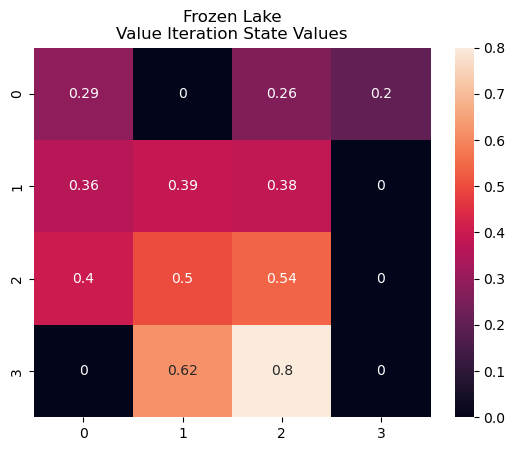

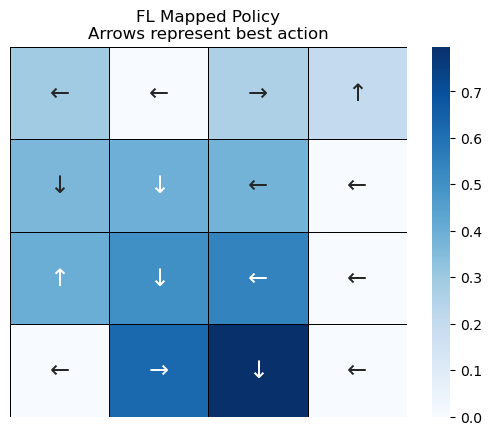

In [194]:
# gym.set_seed(42)
i = 4
# frozen_lake = gym.make('FrozenLake', render_mode=None,)
# frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=i), is_slippery=True, render_mode="ansi")
# frozen_lake.seed(42)

# Map initialization (standard 4x4 map)
desc_1=["SFFF", "FHFH", "FFFH", "HFFG"]

# setting seed
np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=i), is_slippery = True, render_mode = 'ansi')
frozen_lake.reset()

# printing environment
print(frozen_lake.render())

# run VI
V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=0.99, n_iters=20, theta=0.00001)

# plot state values
size=(i,i)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
title="FL Mapped Policy\nArrows represent best action"

fl_map_size=(i,i)
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

In [226]:
# Initializing environment 
size = 4

# setting seed
np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=size), is_slippery = True, render_mode = 'ansi')

runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0

runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0

runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0

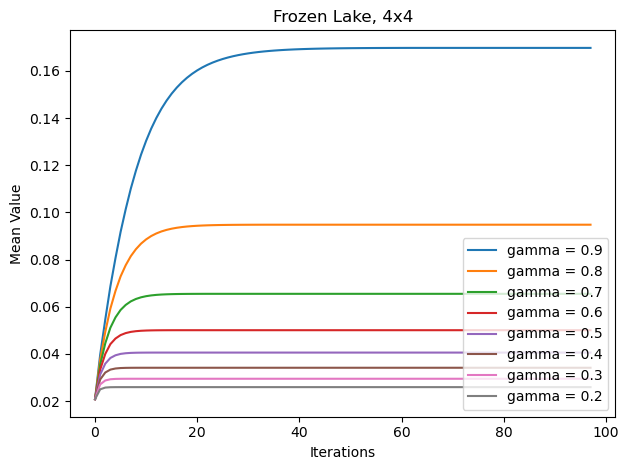

In [227]:
# Generating value per iteration

# Key takeaway: Takes more iteration to converge, 
# but convergence have higher mean values when gamma is higher 
# (prioritize future rewards more, and more willing to explore)
    
for x in range(0,8):
    v_chart = []
    v_per_iter = []
    run_time_per_iter = []
    reward_per_iter = []

    # For-loop for iteration
    for i in range(2, 100):   

        # Initiating start_time
        start_time = time.time()

        # Running value iteration
        V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=0.9-x/10, n_iters=i, theta=0.00001)

        # Appending mean value scores for each iteration
        v_per_iter.append(np.mean(V))
        
        # Appending reward value for each iteration
        episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=100, pi=pi)
        reward_per_iter.append(np.mean(episode_rewards))

        # Recording run time
        end_time = time.time()
        run_time_per_iter.append(end_time)
        
    plt.plot(np.arange(len(v_per_iter)), v_per_iter, label = f'gamma = {round(0.9 - x/10, 2)}')
    
# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.legend(loc = 'lower right')
plt.title(f'Frozen Lake, {size}x{size}')

plt.tight_layout()
plt.show()



runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0

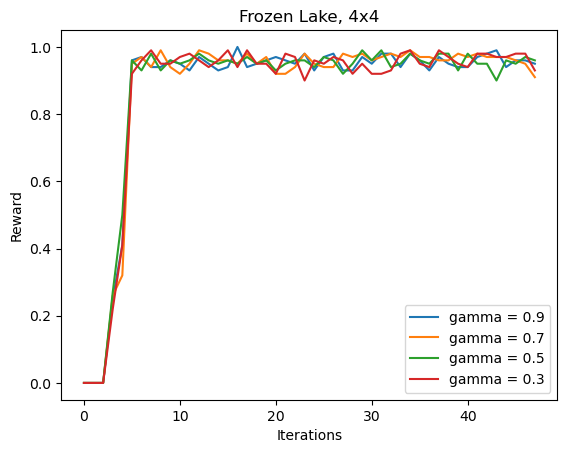

In [283]:
# Generating reward per iteration
# Convergence Rewards per iteration, Size = 4
# Interestingly as size increase, gamma value needs to be alot higher. otherwise, there'll be no rewards.

for x in range(0,4):
    v_chart = []
    v_per_iter = []
    run_time_per_iter = []
    reward_per_iter = []

    # For-loop for iteration
    for i in range(2, 50):   

        # Initiating start_time
        start_time = time.time()

        # Running value iteration
        V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=0.9-x*2/10, n_iters=i, theta=0.00001)

        # Appending mean value scores for each iteration
        v_per_iter.append(np.mean(V))
        
        # Appending reward value for each iteration
        episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=100, pi=pi)
        reward_per_iter.append(np.mean(episode_rewards))

        # Recording run time
        end_time = time.time()
        run_time_per_iter.append(end_time)
        
    plt.plot(np.arange(len(v_per_iter)), reward_per_iter, label = f'gamma = {round(0.9 - x*2/10, 2)}')

# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.legend(loc = 'lower right')
plt.title(f'Frozen Lake, {size}x{size}')
plt.show()



In [13]:
# Initializing environment 
size = 20

# setting seed
np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=size), is_slippery = True, render_mode = 'ansi')

runtime = 0.00 seconds
runtime = 0.04 seconds
runtime = 0.10 seconds
runtime = 0.09 seconds
runtime = 0.16 seconds
runtime = 0.15 seconds
runtime = 0.19 seconds
runtime = 0.24 seconds
runtime = 0.25 seconds
runtime = 0.21 seconds
runtime = 0.23 seconds
runtime = 0.18 seconds
runtime = 0.22 seconds
runtime = 0.21 seconds
runtime = 0.21 seconds
runtime = 0.25 seconds
runtime = 0.25 seconds
runtime = 0.22 seconds
runtime = 0.20 seconds
runtime = 0.25 seconds
runtime = 0.25 seconds
runtime = 0.25 seconds
runtime = 0.21 seconds
runtime = 0.23 seconds
runtime = 0.25 seconds
runtime = 0.24 seconds
runtime = 0.23 seconds
runtime = 0.22 seconds
runtime = 0.23 seconds
runtime = 0.28 seconds
runtime = 0.18 seconds
runtime = 0.23 seconds
runtime = 0.28 seconds
runtime = 0.25 seconds
runtime = 0.24 seconds
runtime = 0.23 seconds
runtime = 0.22 seconds
runtime = 0.28 seconds
runtime = 0.27 seconds
runtime = 0.26 seconds
runtime = 0.23 seconds
runtime = 0.21 seconds
runtime = 0.24 seconds
runtime = 0

runtime = 0.05 seconds
runtime = 0.05 seconds
runtime = 0.07 seconds
runtime = 0.06 seconds
runtime = 0.07 seconds
runtime = 0.05 seconds
runtime = 0.05 seconds
runtime = 0.07 seconds
runtime = 0.06 seconds
runtime = 0.07 seconds
runtime = 0.06 seconds
runtime = 0.06 seconds
runtime = 0.06 seconds
runtime = 0.05 seconds
runtime = 0.07 seconds
runtime = 0.06 seconds
runtime = 0.05 seconds
runtime = 0.05 seconds
runtime = 0.07 seconds
runtime = 0.06 seconds
runtime = 0.05 seconds
runtime = 0.06 seconds
runtime = 0.04 seconds
runtime = 0.05 seconds
runtime = 0.05 seconds
runtime = 0.08 seconds
runtime = 0.04 seconds
runtime = 0.07 seconds
runtime = 0.06 seconds
runtime = 0.08 seconds
runtime = 0.05 seconds
runtime = 0.06 seconds
runtime = 0.06 seconds
runtime = 0.06 seconds
runtime = 0.08 seconds
runtime = 0.05 seconds
runtime = 0.08 seconds
runtime = 0.08 seconds
runtime = 0.07 seconds
runtime = 0.07 seconds
runtime = 0.06 seconds
runtime = 0.00 seconds
runtime = 0.05 seconds
runtime = 0

runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.05 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.04 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.04 seconds
runtime = 0

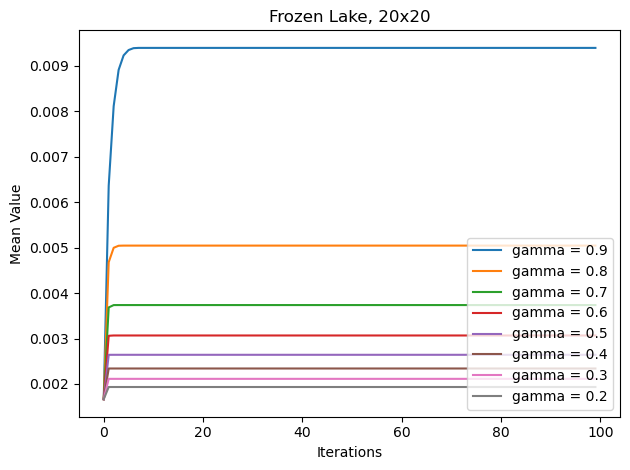

In [652]:
# Gave up on running multiple gamma, run time taking too long, increasing gamma result in more run time too.
# re-running on multiple gammas with lower iterations. Large iterations take too long.
v_per_iter = []
list_x = []
reward_per_iter = []
run_time_per_iter = []


for x in range(0,8):
    v_chart = []
    v_per_iter = []
    run_time_per_iter = []
    reward_per_iter = []

    # For-loop for iteration
    for i in range(2, 1000,10):   

        # Initiating start_time
        start_time = time.time()

        # Running value iteration
        V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=0.9-x/10, n_iters=i, theta=0.00001)

        # Appending mean value scores for each iteration
        v_per_iter.append(np.mean(V))
        
        # Appending reward value for each iteration
        episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=100, pi=pi)
        reward_per_iter.append(np.mean(episode_rewards))

        # Recording run time
        end_time = time.time()
        run_time_per_iter.append(end_time)
        
    plt.plot(np.arange(len(v_per_iter)), v_per_iter, label = f'gamma = {round(0.9 - x/10, 2)}')
    
# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.legend(loc = 'lower right')
plt.title(f'Frozen Lake, {size}x{size}')

plt.tight_layout()
plt.show()




runtime = 0.00 seconds
runtime = 0.03 seconds
runtime = 0.05 seconds
runtime = 0.08 seconds
runtime = 0.10 seconds
runtime = 0.13 seconds
runtime = 0.18 seconds
runtime = 0.24 seconds
runtime = 0.17 seconds
runtime = 0.28 seconds
runtime = 0.21 seconds
runtime = 0.32 seconds
runtime = 0.28 seconds
runtime = 0.28 seconds
runtime = 0.16 seconds
runtime = 0.28 seconds
runtime = 0.27 seconds
runtime = 0.28 seconds
runtime = 0.32 seconds
runtime = 0.23 seconds
runtime = 0.27 seconds
runtime = 0.16 seconds
runtime = 0.15 seconds
runtime = 0.30 seconds
runtime = 0.23 seconds
runtime = 0.24 seconds
runtime = 0.28 seconds
runtime = 0.25 seconds
runtime = 0.16 seconds
runtime = 0.20 seconds
runtime = 0.15 seconds
runtime = 0.16 seconds
runtime = 0.16 seconds
runtime = 0.23 seconds
runtime = 0.27 seconds
runtime = 0.25 seconds
runtime = 0.23 seconds
runtime = 0.17 seconds
runtime = 0.16 seconds
runtime = 0.25 seconds
runtime = 0.18 seconds
runtime = 0.25 seconds
runtime = 0.16 seconds
runtime = 0

runtime = 0.08 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.05 seconds
runtime = 0.06 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.08 seconds
runtime = 0.07 seconds
runtime = 0.08 seconds
runtime = 0.08 seconds
runtime = 0.06 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.05 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.08 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.08 seconds
runtime = 0.04 seconds
runtime = 0.05 seconds
runtime = 0.04 seconds
runtime = 0.06 seconds
runtime = 0.08 seconds
runtime = 0.08 seconds
runtime = 0.05 seconds
runtime = 0.04 seconds
runtime = 0.08 seconds
runtime = 0.06 seconds
runtime = 0.05 seconds
runtime = 0.04 seconds
runtime = 0.07 seconds
runtime = 0.05 seconds
runtime = 0.06 seconds
runtime = 0.05 seconds
runtime = 0.04 seconds
runtime = 0.01 seconds
runtime = 0

runtime = 0.02 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.04 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.04 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.04 seconds
runtime = 0.02 seconds
runtime = 0

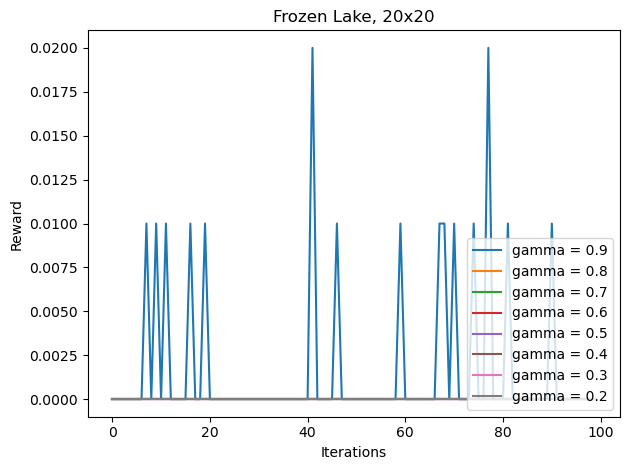

In [14]:
# Gave up on running multiple gamma, run time taking too long, increasing gamma result in more run time too.
# re-running on multiple gammas with lower iterations. Large iterations take too long.
v_per_iter = []
list_x = []
reward_per_iter = []
run_time_per_iter = []


for x in range(0,8):
    v_chart = []
    v_per_iter = []
    run_time_per_iter = []
    reward_per_iter = []

    # For-loop for iteration
    for i in range(2, 1000,10):   

        # Initiating start_time
        start_time = time.time()

        # Running value iteration
        V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=0.9-x/10, n_iters=i, theta=0.00001)

        # Appending mean value scores for each iteration
        v_per_iter.append(np.mean(V))
        
        # Appending reward value for each iteration
        episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=100, pi=pi)
        reward_per_iter.append(np.mean(episode_rewards))

        # Recording run time
        end_time = time.time()
        run_time_per_iter.append(end_time)
        
    plt.plot(np.arange(len(reward_per_iter)), reward_per_iter, label = f'gamma = {round(0.9 - x/10, 2)}')
    
# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.legend(loc = 'lower right')
plt.title(f'Frozen Lake, {size}x{size}')

plt.tight_layout()
plt.show()



size =  4
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
r

runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0

runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0

runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.05 seconds
runtime = 0.04 seconds
runtime = 0.05 seconds
runtime = 0.05 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.06 seconds
runtime = 0.05 seconds
runtime = 0.03 seconds
runtime = 0.04 seconds
runtime = 0.05 seconds
runtime = 0.03 seconds
runtime = 0.05 seconds
runtime = 0.06 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.05 seconds
runtime = 0.07 seconds
runtime = 0.06 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.05 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0

runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.01 seconds
runtime = 0.05 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.04 seconds
runtime = 0.05 seconds
runtime = 0.03 seconds
runtime = 0.05 seconds
runtime = 0.03 seconds
runtime = 0.05 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.04 seconds
runtime = 0.06 seconds
runtime = 0.03 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.02 seconds
runtime = 0.05 seconds
runtime = 0.03 seconds
runtime = 0.05 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.05 seconds
runtime = 0.01 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.05 seconds
runtime = 0.06 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0

runtime = 0.05 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.05 seconds
runtime = 0.05 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.05 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.04 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.05 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.05 seconds
runtime = 0.03 seconds
runtime = 0.05 seconds
runtime = 0.03 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0

runtime = 0.07 seconds
runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.05 seconds
runtime = 0.08 seconds
runtime = 0.07 seconds
runtime = 0.09 seconds
runtime = 0.08 seconds
runtime = 0.08 seconds
runtime = 0.07 seconds
runtime = 0.06 seconds
runtime = 0.08 seconds
runtime = 0.07 seconds
runtime = 0.08 seconds
runtime = 0.07 seconds
runtime = 0.05 seconds
runtime = 0.07 seconds
runtime = 0.07 seconds
runtime = 0.09 seconds
runtime = 0.10 seconds
runtime = 0.06 seconds
runtime = 0.08 seconds
runtime = 0.05 seconds
runtime = 0.05 seconds
runtime = 0.09 seconds
runtime = 0.06 seconds
runtime = 0.06 seconds
runtime = 0.09 seconds
runtime = 0.06 seconds
runtime = 0.06 seconds
runtime = 0.07 seconds
runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.04 seconds
runtime = 0.07 seconds
runtime = 0.08 seconds
runtime = 0.07 seconds
runtime = 0.08 seconds
runtime = 0.08 seconds
runtime = 0.07 seconds
runtime = 0.07 seconds
runtime = 0.10 seconds
runtime = 0

runtime = 0.08 seconds
runtime = 0.07 seconds
runtime = 0.10 seconds
runtime = 0.05 seconds
runtime = 0.07 seconds
runtime = 0.09 seconds
runtime = 0.07 seconds
runtime = 0.06 seconds
runtime = 0.06 seconds
runtime = 0.10 seconds
runtime = 0.07 seconds
runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.06 seconds
runtime = 0.07 seconds
runtime = 0.05 seconds
runtime = 0.07 seconds
runtime = 0.07 seconds
runtime = 0.11 seconds
runtime = 0.07 seconds
runtime = 0.09 seconds
runtime = 0.06 seconds
runtime = 0.10 seconds
runtime = 0.08 seconds
runtime = 0.07 seconds
runtime = 0.06 seconds
runtime = 0.06 seconds
runtime = 0.07 seconds
runtime = 0.08 seconds
runtime = 0.12 seconds
runtime = 0.07 seconds
runtime = 0.07 seconds
runtime = 0.08 seconds
runtime = 0.08 seconds
runtime = 0.09 seconds
runtime = 0.07 seconds
runtime = 0.09 seconds
runtime = 0.10 seconds
runtime = 0.07 seconds
runtime = 0.06 seconds
runtime = 0.04 seconds
runtime = 0.07 seconds
runtime = 0.08 seconds
runtime = 0

runtime = 0.07 seconds
runtime = 0.05 seconds
runtime = 0.06 seconds
runtime = 0.08 seconds
runtime = 0.07 seconds
runtime = 0.08 seconds
runtime = 0.09 seconds
runtime = 0.06 seconds
runtime = 0.09 seconds
runtime = 0.05 seconds
runtime = 0.06 seconds
runtime = 0.09 seconds
runtime = 0.10 seconds
runtime = 0.08 seconds
runtime = 0.10 seconds
runtime = 0.09 seconds
runtime = 0.09 seconds
runtime = 0.09 seconds
runtime = 0.09 seconds
runtime = 0.09 seconds
runtime = 0.05 seconds
runtime = 0.05 seconds
runtime = 0.09 seconds
runtime = 0.04 seconds
runtime = 0.08 seconds
runtime = 0.07 seconds
runtime = 0.08 seconds
runtime = 0.08 seconds
runtime = 0.09 seconds
runtime = 0.08 seconds
runtime = 0.07 seconds
runtime = 0.10 seconds
runtime = 0.06 seconds
runtime = 0.07 seconds
runtime = 0.09 seconds
runtime = 0.06 seconds
runtime = 0.06 seconds
runtime = 0.05 seconds
runtime = 0.06 seconds
runtime = 0.05 seconds
runtime = 0.07 seconds
runtime = 0.08 seconds
runtime = 0.07 seconds
runtime = 0

runtime = 0.16 seconds
runtime = 0.14 seconds
runtime = 0.11 seconds
runtime = 0.15 seconds
runtime = 0.13 seconds
runtime = 0.14 seconds
runtime = 0.12 seconds
runtime = 0.13 seconds
runtime = 0.15 seconds
runtime = 0.15 seconds
runtime = 0.13 seconds
runtime = 0.14 seconds
runtime = 0.16 seconds
runtime = 0.15 seconds
runtime = 0.14 seconds
runtime = 0.15 seconds
runtime = 0.13 seconds
runtime = 0.12 seconds
runtime = 0.12 seconds
runtime = 0.15 seconds
runtime = 0.13 seconds
runtime = 0.14 seconds
runtime = 0.13 seconds
runtime = 0.15 seconds
runtime = 0.13 seconds
runtime = 0.12 seconds
runtime = 0.12 seconds
runtime = 0.14 seconds
runtime = 0.15 seconds
runtime = 0.14 seconds
runtime = 0.15 seconds
runtime = 0.17 seconds
runtime = 0.13 seconds
runtime = 0.12 seconds
runtime = 0.13 seconds
runtime = 0.15 seconds
runtime = 0.12 seconds
runtime = 0.11 seconds
runtime = 0.15 seconds
runtime = 0.12 seconds
runtime = 0.13 seconds
runtime = 0.16 seconds
runtime = 0.13 seconds
runtime = 0

runtime = 0.15 seconds
runtime = 0.12 seconds
runtime = 0.15 seconds
runtime = 0.17 seconds
runtime = 0.14 seconds
runtime = 0.13 seconds
runtime = 0.13 seconds
runtime = 0.13 seconds
runtime = 0.11 seconds
runtime = 0.11 seconds
runtime = 0.11 seconds
runtime = 0.16 seconds
runtime = 0.14 seconds
runtime = 0.15 seconds
runtime = 0.12 seconds
runtime = 0.16 seconds
runtime = 0.12 seconds
runtime = 0.15 seconds
runtime = 0.12 seconds
runtime = 0.15 seconds
runtime = 0.14 seconds
runtime = 0.14 seconds
runtime = 0.14 seconds
runtime = 0.12 seconds
runtime = 0.13 seconds
runtime = 0.13 seconds
runtime = 0.14 seconds
runtime = 0.13 seconds
runtime = 0.14 seconds
runtime = 0.13 seconds
runtime = 0.15 seconds
runtime = 0.14 seconds
runtime = 0.15 seconds
runtime = 0.14 seconds
runtime = 0.15 seconds
runtime = 0.15 seconds
runtime = 0.13 seconds
runtime = 0.15 seconds
runtime = 0.15 seconds
runtime = 0.13 seconds
runtime = 0.14 seconds
runtime = 0.10 seconds
runtime = 0.12 seconds
runtime = 0

runtime = 0.16 seconds
runtime = 0.15 seconds
runtime = 0.12 seconds
runtime = 0.10 seconds
runtime = 0.13 seconds
runtime = 0.12 seconds
runtime = 0.15 seconds
runtime = 0.12 seconds
runtime = 0.13 seconds
runtime = 0.11 seconds
runtime = 0.14 seconds
runtime = 0.12 seconds
runtime = 0.13 seconds
runtime = 0.15 seconds
runtime = 0.12 seconds
runtime = 0.12 seconds
runtime = 0.16 seconds
runtime = 0.11 seconds
runtime = 0.14 seconds
runtime = 0.14 seconds
runtime = 0.12 seconds
runtime = 0.17 seconds
runtime = 0.16 seconds
runtime = 0.14 seconds
runtime = 0.12 seconds
runtime = 0.12 seconds
runtime = 0.10 seconds
runtime = 0.16 seconds
runtime = 0.16 seconds
runtime = 0.14 seconds
runtime = 0.14 seconds
runtime = 0.10 seconds
runtime = 0.16 seconds
runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.14 seconds
runtime = 0.15 seconds
runtime = 0.11 seconds
runtime = 0.12 seconds
runtime = 0.14 seconds
runtime = 0.14 seconds
runtime = 0.12 seconds
runtime = 0.12 seconds
runtime = 0

runtime = 0.20 seconds
runtime = 0.23 seconds
runtime = 0.24 seconds
runtime = 0.25 seconds
runtime = 0.22 seconds
runtime = 0.19 seconds
runtime = 0.23 seconds
runtime = 0.24 seconds
runtime = 0.23 seconds
runtime = 0.26 seconds
runtime = 0.26 seconds
runtime = 0.24 seconds
runtime = 0.24 seconds
runtime = 0.23 seconds
runtime = 0.20 seconds
runtime = 0.22 seconds
runtime = 0.24 seconds
runtime = 0.21 seconds
runtime = 0.18 seconds
runtime = 0.21 seconds
runtime = 0.22 seconds
runtime = 0.26 seconds
runtime = 0.22 seconds
runtime = 0.23 seconds
runtime = 0.20 seconds
runtime = 0.22 seconds
runtime = 0.25 seconds
runtime = 0.23 seconds
runtime = 0.17 seconds
runtime = 0.23 seconds
runtime = 0.23 seconds
runtime = 0.23 seconds
runtime = 0.24 seconds
runtime = 0.22 seconds
runtime = 0.25 seconds
runtime = 0.19 seconds
runtime = 0.20 seconds
runtime = 0.22 seconds
runtime = 0.18 seconds
runtime = 0.23 seconds
runtime = 0.22 seconds
runtime = 0.19 seconds
runtime = 0.25 seconds
runtime = 0

runtime = 0.18 seconds
runtime = 0.22 seconds
runtime = 0.21 seconds
runtime = 0.23 seconds
runtime = 0.23 seconds
runtime = 0.22 seconds
runtime = 0.23 seconds
runtime = 0.22 seconds
runtime = 0.22 seconds
runtime = 0.24 seconds
runtime = 0.20 seconds
runtime = 0.19 seconds
runtime = 0.22 seconds
runtime = 0.21 seconds
runtime = 0.23 seconds
runtime = 0.17 seconds
runtime = 0.23 seconds
runtime = 0.21 seconds
runtime = 0.19 seconds
runtime = 0.17 seconds
runtime = 0.22 seconds
runtime = 0.23 seconds
runtime = 0.16 seconds
runtime = 0.25 seconds
runtime = 0.23 seconds
runtime = 0.22 seconds
runtime = 0.22 seconds
runtime = 0.21 seconds
runtime = 0.26 seconds
runtime = 0.22 seconds
runtime = 0.25 seconds
runtime = 0.25 seconds
runtime = 0.19 seconds
runtime = 0.17 seconds
runtime = 0.20 seconds
runtime = 0.23 seconds
runtime = 0.21 seconds
runtime = 0.21 seconds
runtime = 0.19 seconds
runtime = 0.25 seconds
runtime = 0.19 seconds
runtime = 0.21 seconds
runtime = 0.19 seconds
runtime = 0

runtime = 0.05 seconds
runtime = 0.06 seconds
runtime = 0.05 seconds
runtime = 0.05 seconds
runtime = 0.07 seconds
runtime = 0.06 seconds
runtime = 0.08 seconds
runtime = 0.09 seconds
runtime = 0.07 seconds
runtime = 0.13 seconds
runtime = 0.09 seconds
runtime = 0.09 seconds
runtime = 0.12 seconds
runtime = 0.12 seconds
runtime = 0.08 seconds
runtime = 0.10 seconds
runtime = 0.11 seconds
runtime = 0.17 seconds
runtime = 0.11 seconds
runtime = 0.15 seconds
runtime = 0.18 seconds
runtime = 0.13 seconds
runtime = 0.10 seconds
runtime = 0.16 seconds
runtime = 0.19 seconds
runtime = 0.16 seconds
runtime = 0.14 seconds
runtime = 0.14 seconds
runtime = 0.13 seconds
runtime = 0.10 seconds
runtime = 0.15 seconds
runtime = 0.12 seconds
runtime = 0.14 seconds
runtime = 0.11 seconds
runtime = 0.13 seconds
runtime = 0.12 seconds
runtime = 0.15 seconds
runtime = 0.15 seconds
runtime = 0.16 seconds
runtime = 0.13 seconds
runtime = 0.12 seconds
runtime = 0.13 seconds
runtime = 0.15 seconds
runtime = 0

runtime = 0.15 seconds
runtime = 0.11 seconds
runtime = 0.14 seconds
runtime = 0.14 seconds
runtime = 0.14 seconds
runtime = 0.16 seconds
runtime = 0.18 seconds
runtime = 0.12 seconds
runtime = 0.15 seconds
runtime = 0.16 seconds
runtime = 0.17 seconds
runtime = 0.17 seconds
runtime = 0.15 seconds
runtime = 0.12 seconds
runtime = 0.17 seconds
runtime = 0.15 seconds
runtime = 0.15 seconds
runtime = 0.18 seconds
runtime = 0.14 seconds
runtime = 0.13 seconds
runtime = 0.16 seconds
runtime = 0.14 seconds
runtime = 0.16 seconds
runtime = 0.14 seconds
runtime = 0.13 seconds
runtime = 0.13 seconds
runtime = 0.15 seconds
runtime = 0.12 seconds
runtime = 0.16 seconds
runtime = 0.19 seconds
runtime = 0.16 seconds
runtime = 0.12 seconds
runtime = 0.13 seconds
runtime = 0.15 seconds
runtime = 0.11 seconds
runtime = 0.15 seconds
runtime = 0.13 seconds
runtime = 0.14 seconds
runtime = 0.14 seconds
runtime = 0.14 seconds
runtime = 0.11 seconds
runtime = 0.16 seconds
runtime = 0.18 seconds
runtime = 0

runtime = 0.16 seconds
runtime = 0.15 seconds
runtime = 0.13 seconds
runtime = 0.19 seconds
runtime = 0.15 seconds
runtime = 0.16 seconds
runtime = 0.14 seconds
runtime = 0.12 seconds
runtime = 0.16 seconds
runtime = 0.14 seconds
runtime = 0.15 seconds
runtime = 0.15 seconds
runtime = 0.14 seconds
runtime = 0.16 seconds
runtime = 0.15 seconds
runtime = 0.15 seconds
runtime = 0.12 seconds
runtime = 0.20 seconds
runtime = 0.16 seconds
runtime = 0.14 seconds
runtime = 0.15 seconds
runtime = 0.14 seconds
runtime = 0.18 seconds
runtime = 0.12 seconds
runtime = 0.15 seconds
runtime = 0.17 seconds
runtime = 0.13 seconds
runtime = 0.17 seconds
runtime = 0.11 seconds
runtime = 0.19 seconds
runtime = 0.16 seconds
runtime = 0.15 seconds
runtime = 0.16 seconds
runtime = 0.17 seconds
runtime = 0.18 seconds
runtime = 0.16 seconds
runtime = 0.13 seconds
runtime = 0.16 seconds
runtime = 0.17 seconds
runtime = 0.13 seconds
runtime = 0.16 seconds
runtime = 0.15 seconds
runtime = 0.17 seconds
runtime = 0

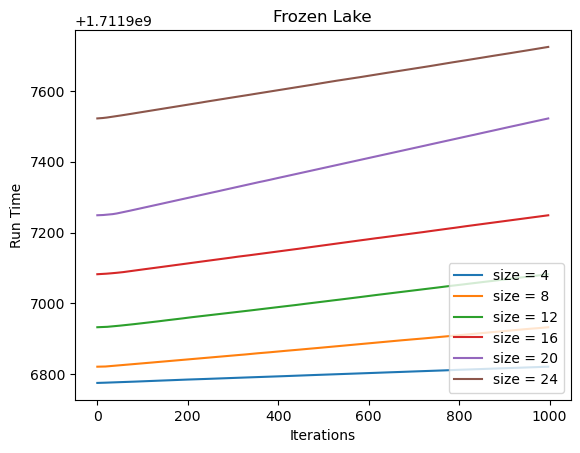

In [643]:
# RUN THIS CELL

for n in (range(4,28,4)):
    print('size = ', n)
    v_chart = []
    v_per_iter = []
    run_time_per_iter = []
    reward_per_iter = []
    
    # setting seed
    np.random.seed(42)

    # make gym environment
    frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=n), is_slippery = True, render_mode = 'ansi')

    for i in range(2, 1000):   

        # Initiating start_time
        start_time = time.time()

        # Running value iteration
        V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=0.9, n_iters=i, theta=0.00001)

        # Appending mean value scores for each iteration
        v_per_iter.append(np.mean(V))

        # Appending reward value for each iteration
        episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=100, pi=pi)
        reward_per_iter.append(np.mean(episode_rewards))

        # Recording run time
        end_time = time.time()
        run_time_per_iter.append(end_time)
        
    plt.plot(np.arange(len(v_per_iter)), run_time_per_iter, label = f'size = {n}')

# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Run Time')
plt.legend(loc = 'lower right')
plt.title(f'Frozen Lake')
plt.show()    

Final Policy - non-Deterministic (size = 4)


SHFF
FFFH
FFFH
HFFG

runtime = 0.03 seconds


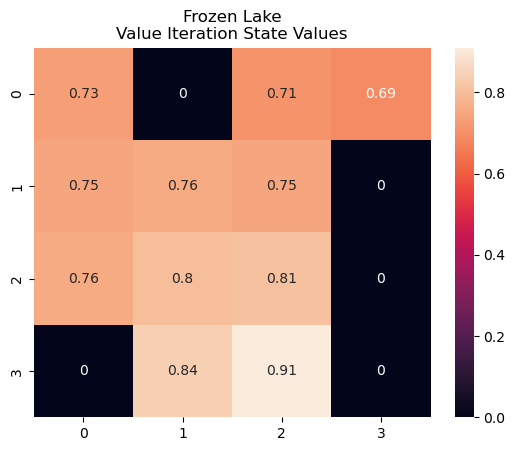

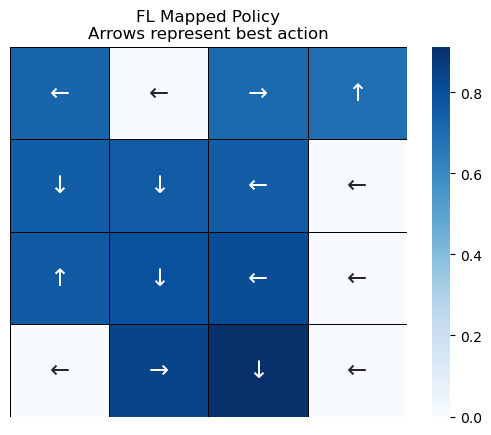

Total Run Time =  0.2432880401611328


In [272]:
start_time = time.time()

sz = 4

# setting seed
# np.random.seed(43)

# Map initialization (standard 4x4 map)
desc_1=["SFFF", "FHFH", "FFFH", "HFFG"]

# setting seed
np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
frozen_lake.reset()

# printing environment
print(frozen_lake.render())

# run VI
V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=0.99, n_iters=50000, theta=0.000001)

# plot state values
size=(sz,sz)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
title="FL Mapped Policy\nArrows represent best action"

fl_map_size=(sz,sz)
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

end_time = time.time()
run_time = end_time - start_time  
print(f'Total Run Time = ', run_time)

Final Policy - Deterministic


SHFF
FFFH
FFFH
HFFG

runtime = 0.00 seconds


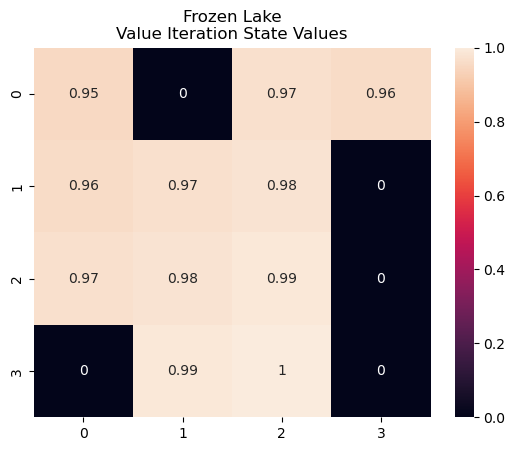

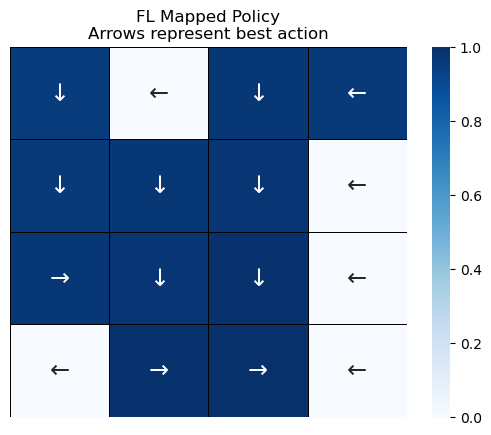

Total Run Time =  0.2204303741455078


In [273]:
start_time = time.time()

sz = 4

# setting seed
# np.random.seed(43)

# Map initialization (standard 4x4 map)
desc_1=["SFFF", "FHFH", "FFFH", "HFFG"]

# setting seed
np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = False, render_mode = 'ansi')
frozen_lake.reset()

# printing environment
print(frozen_lake.render())

# run VI
V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=0.99, n_iters=50000, theta=0.000001)

# plot state values
size=(sz,sz)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
title="FL Mapped Policy\nArrows represent best action"

fl_map_size=(sz,sz)
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

end_time = time.time()
run_time = end_time - start_time  
print(f'Total Run Time = ', run_time)

Final Policy - non-Deterministic (size = 20)


SHFFFFFHFFFHHFFFFFFF
FFFFFFFFFFFFFHHHFFFF
FFFHFFFFFFHFHHFHFFFF
FFHFFFFHFHFFFHFFFFFF
HFFFFFFFHFFFFFFFFFFF
FFFFHFFFFFFFHHFHHFHF
HHFFFFHHFFFFFFHFFFFH
HFFFFFFFFFHFFFHFFFFF
FFFFFHFFFFFFFFFFFFHF
FFHHFFHFFFFHHFFFFHHF
FFFHFFFFFFFFFFFFFFFH
FFFFFFHFHFFFFFFFFFFF
HHHFFHFHHHFFHFFFHFFF
FHFFHFFFFFHHHHFFFFFF
HFFFFFFFFFFFHFFFFFFF
FFFFFHFFFFFFFHHFFFFF
FFFFHFFFFFFFFFFFHFFF
FFFFFFFFFFFHFFFFFFHF
FFFFHFHHFFFFFFFFHFHF
FFFHFHFFFHHFFFFHHFFG

runtime = 5.05 seconds


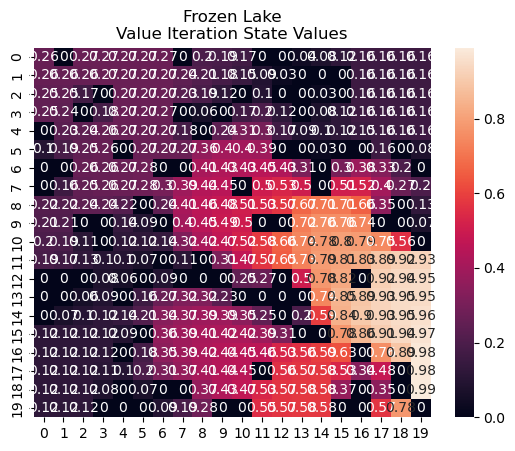

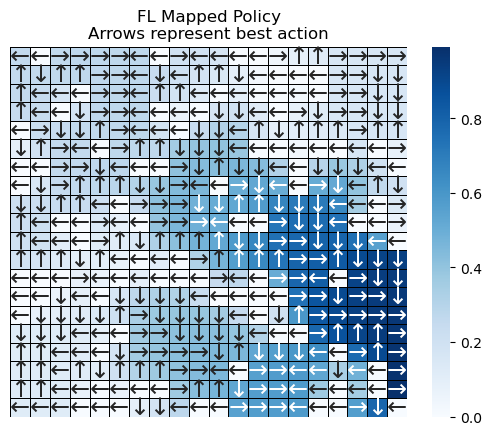

Total Run Time =  7.724578857421875


In [644]:
# RUN THIS CELL

start_time = time.time()

sz = 20

# setting seed
# np.random.seed(43)

# Map initialization (standard 4x4 map)
desc_1=["SFFF", "FHFH", "FFFH", "HFFG"]

# setting seed
np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
frozen_lake.reset()

# printing environment
print(frozen_lake.render())

# run VI
V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=0.9999, n_iters=1000000, theta=0.000001)

# plot state values
size=(sz,sz)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
title="FL Mapped Policy\nArrows represent best action"

fl_map_size=(sz,sz)
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

end_time = time.time()
run_time = end_time - start_time  
print(f'Total Run Time = ', run_time)

Final Policy - Deterministic (size = 20)


SHFFFFFHFFFHHFFFFFFF
FFFFFFFFFFFFFHHHFFFF
FFFHFFFFFFHFHHFHFFFF
FFHFFFFHFHFFFHFFFFFF
HFFFFFFFHFFFFFFFFFFF
FFFFHFFFFFFFHHFHHFHF
HHFFFFHHFFFFFFHFFFFH
HFFFFFFFFFHFFFHFFFFF
FFFFFHFFFFFFFFFFFFHF
FFHHFFHFFFFHHFFFFHHF
FFFHFFFFFFFFFFFFFFFH
FFFFFFHFHFFFFFFFFFFF
HHHFFHFHHHFFHFFFHFFF
FHFFHFFFFFHHHHFFFFFF
HFFFFFFFFFFFHFFFFFFF
FFFFFHFFFFFFFHHFFFFF
FFFFHFFFFFFFFFFFHFFF
FFFFFFFFFFFHFFFFFFHF
FFFFHFHHFFFFFFFFHFHF
FFFHFHFFFHHFFFFHHFFG

runtime = 0.06 seconds


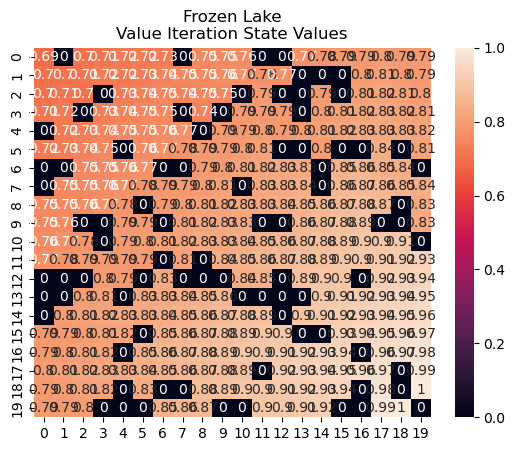

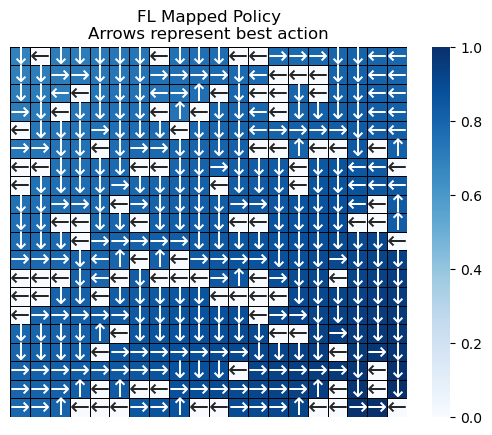

Total Run Time =  1.2674319744110107


In [645]:
# RUN THIS CELL

start_time = time.time()

sz = 20

# setting seed
# np.random.seed(43)

# Map initialization (standard 4x4 map)
desc_1=["SFFF", "FHFH", "FFFH", "HFFG"]

# setting seed
np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = False, render_mode = 'ansi')
frozen_lake.reset()

# printing environment
print(frozen_lake.render())

# run VI
V, V_track, pi = Planner(frozen_lake.P).value_iteration(gamma=0.99, n_iters=50000, theta=0.000001)

# plot state values
size=(sz,sz)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
title="FL Mapped Policy\nArrows represent best action"

fl_map_size=(sz,sz)
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

end_time = time.time()
run_time = end_time - start_time  
print(f'Total Run Time = ', run_time)

# 1.2 Grid World Policy Iteration


SHFF
FFFH
FFFH
HFFG

runtime = 0.02 seconds


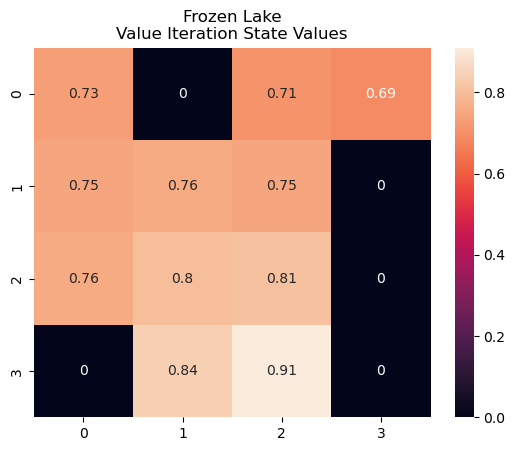

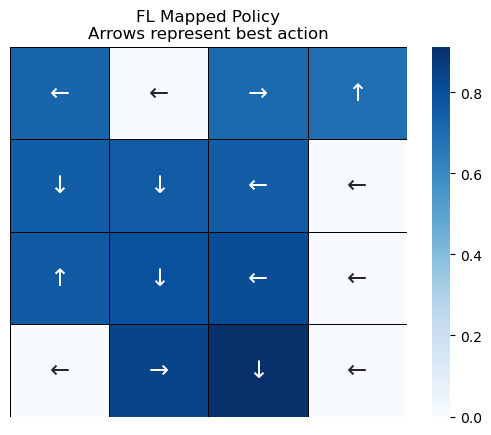

In [274]:
# gym.set_seed(42)
i = 4
# frozen_lake = gym.make('FrozenLake', render_mode=None,)
# frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=i), is_slippery=True, render_mode="ansi")
# frozen_lake.seed(42)

# Map initialization (standard 4x4 map)
desc_1=["SFFF", "FHFH", "FFFH", "HFFG"]

# setting seed
np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=i), is_slippery = True, render_mode = 'ansi')
frozen_lake.reset()

# printing environment
print(frozen_lake.render())

# run VI
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(gamma=0.99, n_iters=20, theta=0.00001)

# plot state values
size=(i,i)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
title="FL Mapped Policy\nArrows represent best action"

fl_map_size=(i,i)
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

In [276]:
# Initializing environment 
size = 4

# setting seed
np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=size), is_slippery = True, render_mode = 'ansi')

C:\Users\marcu\anaconda3\Lib\site-packages\bettermdptools\algorithms\planner.py:126: UserWarning: Max iterations reached before convergence.  Check n_iters.
  warnings.warn("Max iterations reached before convergence.  Check n_iters.")


runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0

runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0

runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0

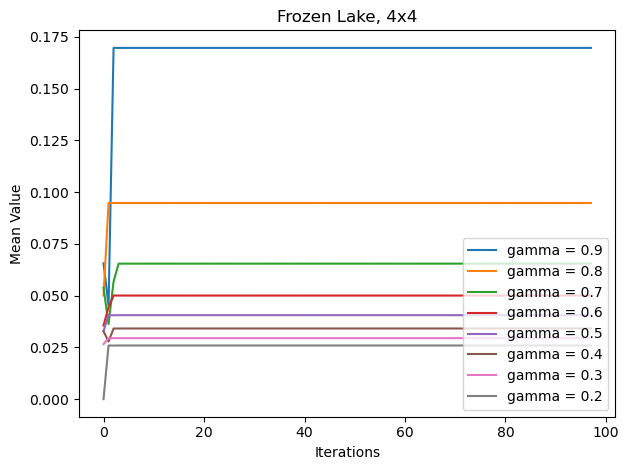

In [277]:
# Generating value per iteration

# Key takeaway: Takes more iteration to converge, 
# but convergence have higher mean values when gamma is higher 
# (prioritize future rewards more, and more willing to explore)
    
for x in range(0,8):
    v_chart = []
    v_per_iter = []
    run_time_per_iter = []
    reward_per_iter = []

    # For-loop for iteration
    for i in range(2, 100):   

        # Initiating start_time
        start_time = time.time()

        # Running value iteration
        V, V_track, pi = Planner(frozen_lake.P).policy_iteration(gamma=0.9-x/10, n_iters=i, theta=0.00001)

        # Appending mean value scores for each iteration
        v_per_iter.append(np.mean(V))
        
        # Appending reward value for each iteration
        episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=100, pi=pi)
        reward_per_iter.append(np.mean(episode_rewards))

        # Recording run time
        end_time = time.time()
        run_time_per_iter.append(end_time)
        
    plt.plot(np.arange(len(v_per_iter)), v_per_iter, label = f'gamma = {round(0.9 - x/10, 2)}')
    
# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.legend(loc = 'lower right')
plt.title(f'Frozen Lake, {size}x{size}')

plt.tight_layout()
plt.show()

runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0

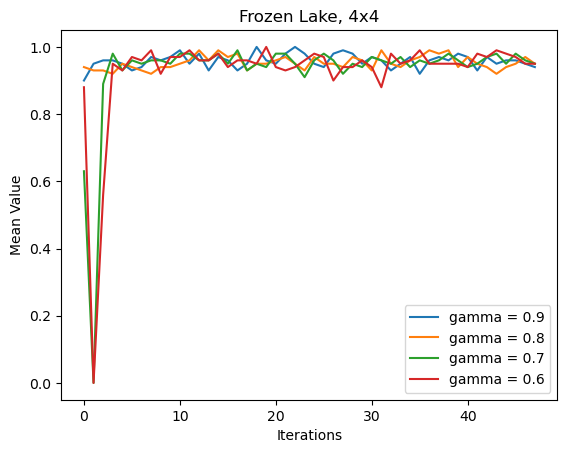

In [280]:
# Generating reward per iteration
# Convergence Rewards per iteration, Size = 4
# Interestingly as size increase, gamma value needs to be alot higher. otherwise, there'll be no rewards.

for x in range(0,4):
    v_chart = []
    v_per_iter = []
    run_time_per_iter = []
    reward_per_iter = []

    # For-loop for iteration
    for i in range(2, 50):   

        # Initiating start_time
        start_time = time.time()

        # Running value iteration
        V, V_track, pi = Planner(frozen_lake.P).policy_iteration(gamma=0.9-x*2/10, n_iters=i, theta=0.00001)

        # Appending mean value scores for each iteration
        v_per_iter.append(np.mean(V))
        
        # Appending reward value for each iteration
        episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=100, pi=pi)
        reward_per_iter.append(np.mean(episode_rewards))

        # Recording run time
        end_time = time.time()
        run_time_per_iter.append(end_time)
        
    plt.plot(np.arange(len(v_per_iter)), reward_per_iter, label = f'gamma = {round(0.9 - x/10, 2)}')

# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.legend(loc = 'lower right')
plt.title(f'Frozen Lake, {size}x{size}')
plt.show()



Convergence charts: Size = 20

In [15]:
# RUN THIS CELL

# Initializing environment 
size = 20

# setting seed
np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=size), is_slippery = True, render_mode = 'ansi')

runtime = 0.02 seconds
runtime = 0.14 seconds
runtime = 0.11 seconds
runtime = 0.29 seconds
runtime = 0.18 seconds
runtime = 0.35 seconds
runtime = 0.14 seconds
runtime = 0.30 seconds
runtime = 0.08 seconds
runtime = 0.25 seconds
runtime = 0.15 seconds
runtime = 0.24 seconds
runtime = 0.30 seconds
runtime = 0.16 seconds
runtime = 0.22 seconds
runtime = 0.25 seconds
runtime = 0.25 seconds
runtime = 0.25 seconds
runtime = 0.34 seconds
runtime = 0.13 seconds
runtime = 0.28 seconds
runtime = 0.15 seconds
runtime = 0.22 seconds
runtime = 0.20 seconds
runtime = 0.14 seconds
runtime = 0.18 seconds
runtime = 0.16 seconds
runtime = 0.13 seconds
runtime = 0.16 seconds
runtime = 0.12 seconds
runtime = 0.11 seconds
runtime = 0.30 seconds
runtime = 0.14 seconds
runtime = 0.26 seconds
runtime = 0.11 seconds
runtime = 0.29 seconds
runtime = 0.14 seconds
runtime = 0.09 seconds
runtime = 0.12 seconds
runtime = 0.11 seconds
runtime = 0.28 seconds
runtime = 0.14 seconds
runtime = 0.16 seconds
runtime = 0

runtime = 0.09 seconds
runtime = 0.12 seconds
runtime = 0.13 seconds
runtime = 0.08 seconds
runtime = 0.08 seconds
runtime = 0.13 seconds
runtime = 0.13 seconds
runtime = 0.12 seconds
runtime = 0.10 seconds
runtime = 0.07 seconds
runtime = 0.09 seconds
runtime = 0.08 seconds
runtime = 0.09 seconds
runtime = 0.08 seconds
runtime = 0.11 seconds
runtime = 0.12 seconds
runtime = 0.13 seconds
runtime = 0.09 seconds
runtime = 0.11 seconds
runtime = 0.11 seconds
runtime = 0.12 seconds
runtime = 0.11 seconds
runtime = 0.08 seconds
runtime = 0.10 seconds
runtime = 0.09 seconds
runtime = 0.16 seconds
runtime = 0.12 seconds
runtime = 0.10 seconds
runtime = 0.11 seconds
runtime = 0.09 seconds
runtime = 0.13 seconds
runtime = 0.10 seconds
runtime = 0.15 seconds
runtime = 0.12 seconds
runtime = 0.08 seconds
runtime = 0.09 seconds
runtime = 0.14 seconds
runtime = 0.12 seconds
runtime = 0.13 seconds
runtime = 0.10 seconds
runtime = 0.13 seconds
runtime = 0.07 seconds
runtime = 0.11 seconds
runtime = 0

runtime = 0.10 seconds
runtime = 0.09 seconds
runtime = 0.11 seconds
runtime = 0.14 seconds
runtime = 0.12 seconds
runtime = 0.15 seconds
runtime = 0.10 seconds
runtime = 0.08 seconds
runtime = 0.10 seconds
runtime = 0.11 seconds
runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.08 seconds
runtime = 0.09 seconds
runtime = 0.08 seconds
runtime = 0.15 seconds
runtime = 0.16 seconds
runtime = 0.15 seconds
runtime = 0.09 seconds
runtime = 0.09 seconds
runtime = 0.08 seconds
runtime = 0.11 seconds
runtime = 0.13 seconds
runtime = 0.11 seconds
runtime = 0.09 seconds
runtime = 0.09 seconds
runtime = 0.09 seconds
runtime = 0.10 seconds
runtime = 0.16 seconds
runtime = 0.15 seconds
runtime = 0.09 seconds
runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.09 seconds
runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.13 seconds
runtime = 0.13 seconds
runtime = 0

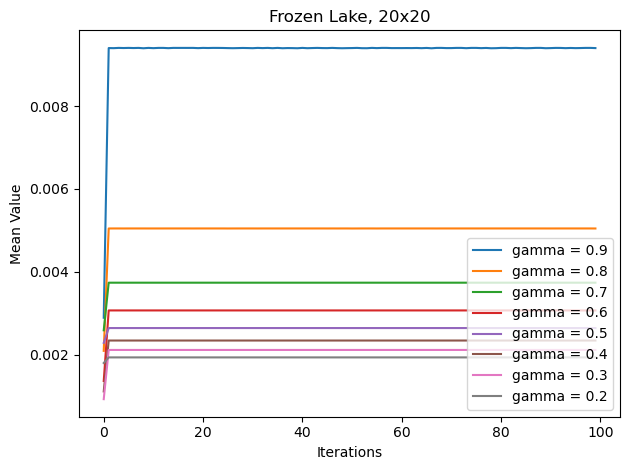

In [654]:
# RUN THIS CELL

v_per_iter = []
list_x = []
reward_per_iter = []
run_time_per_iter = []


for x in range(0,8):
    v_chart = []
    v_per_iter = []
    run_time_per_iter = []
    reward_per_iter = []

    # For-loop for iteration
    for i in range(2, 1000, 10):   

        # Initiating start_time
        start_time = time.time()

        # Running value iteration
        V, V_track, pi = Planner(frozen_lake.P).policy_iteration(gamma=0.9-x/10, n_iters=i, theta=0.00001)

        # Appending mean value scores for each iteration
        v_per_iter.append(np.mean(V))
        
        # Appending reward value for each iteration
        episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=100, pi=pi)
        reward_per_iter.append(np.mean(episode_rewards))

        # Recording run time
        end_time = time.time()
        run_time_per_iter.append(end_time)
        
    plt.plot(np.arange(len(v_per_iter)), v_per_iter, label = f'gamma = {round(0.9 - x/10, 2)}')
    
# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.legend(loc = 'lower right')
plt.title(f'Frozen Lake, {size}x{size}')

plt.tight_layout()
plt.show()


runtime = 0.01 seconds
runtime = 0.20 seconds
runtime = 0.25 seconds
runtime = 0.20 seconds
runtime = 0.15 seconds
runtime = 0.27 seconds
runtime = 0.17 seconds
runtime = 0.32 seconds
runtime = 0.17 seconds
runtime = 0.21 seconds
runtime = 0.08 seconds
runtime = 0.14 seconds
runtime = 0.33 seconds
runtime = 0.24 seconds
runtime = 0.14 seconds
runtime = 0.22 seconds
runtime = 0.37 seconds
runtime = 0.34 seconds
runtime = 0.29 seconds
runtime = 0.25 seconds
runtime = 0.19 seconds
runtime = 0.17 seconds
runtime = 0.26 seconds
runtime = 0.10 seconds
runtime = 0.15 seconds
runtime = 0.08 seconds
runtime = 0.15 seconds
runtime = 0.25 seconds
runtime = 0.28 seconds
runtime = 0.28 seconds
runtime = 0.16 seconds
runtime = 0.22 seconds
runtime = 0.09 seconds
runtime = 0.26 seconds
runtime = 0.16 seconds
runtime = 0.43 seconds
runtime = 0.26 seconds
runtime = 0.11 seconds
runtime = 0.14 seconds
runtime = 0.22 seconds
runtime = 0.11 seconds
runtime = 0.10 seconds
runtime = 0.12 seconds
runtime = 0

runtime = 0.11 seconds
runtime = 0.14 seconds
runtime = 0.18 seconds
runtime = 0.16 seconds
runtime = 0.10 seconds
runtime = 0.09 seconds
runtime = 0.11 seconds
runtime = 0.12 seconds
runtime = 0.18 seconds
runtime = 0.14 seconds
runtime = 0.11 seconds
runtime = 0.09 seconds
runtime = 0.10 seconds
runtime = 0.11 seconds
runtime = 0.18 seconds
runtime = 0.14 seconds
runtime = 0.14 seconds
runtime = 0.16 seconds
runtime = 0.08 seconds
runtime = 0.12 seconds
runtime = 0.14 seconds
runtime = 0.11 seconds
runtime = 0.10 seconds
runtime = 0.20 seconds
runtime = 0.14 seconds
runtime = 0.09 seconds
runtime = 0.15 seconds
runtime = 0.13 seconds
runtime = 0.12 seconds
runtime = 0.08 seconds
runtime = 0.09 seconds
runtime = 0.15 seconds
runtime = 0.10 seconds
runtime = 0.12 seconds
runtime = 0.08 seconds
runtime = 0.10 seconds
runtime = 0.09 seconds
runtime = 0.10 seconds
runtime = 0.13 seconds
runtime = 0.10 seconds
runtime = 0.10 seconds
runtime = 0.15 seconds
runtime = 0.01 seconds
runtime = 0

runtime = 0.14 seconds
runtime = 0.11 seconds
runtime = 0.13 seconds
runtime = 0.09 seconds
runtime = 0.10 seconds
runtime = 0.11 seconds
runtime = 0.16 seconds
runtime = 0.09 seconds
runtime = 0.11 seconds
runtime = 0.12 seconds
runtime = 0.14 seconds
runtime = 0.17 seconds
runtime = 0.09 seconds
runtime = 0.15 seconds
runtime = 0.08 seconds
runtime = 0.10 seconds
runtime = 0.13 seconds
runtime = 0.12 seconds
runtime = 0.08 seconds
runtime = 0.08 seconds
runtime = 0.09 seconds
runtime = 0.10 seconds
runtime = 0.17 seconds
runtime = 0.17 seconds
runtime = 0.10 seconds
runtime = 0.13 seconds
runtime = 0.14 seconds
runtime = 0.13 seconds
runtime = 0.15 seconds
runtime = 0.18 seconds
runtime = 0.17 seconds
runtime = 0.15 seconds
runtime = 0.19 seconds
runtime = 0.08 seconds
runtime = 0.18 seconds
runtime = 0.13 seconds
runtime = 0.13 seconds
runtime = 0.11 seconds
runtime = 0.11 seconds
runtime = 0.19 seconds
runtime = 0.17 seconds
runtime = 0.13 seconds
runtime = 0.09 seconds
runtime = 0

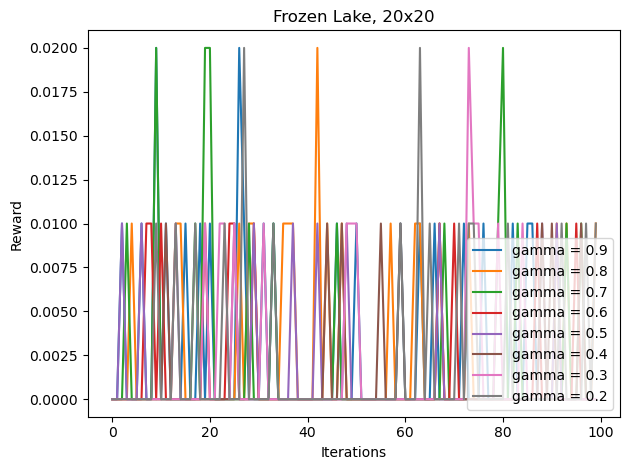

In [17]:
# Generating reward per iteration
# Convergence Rewards per iteration, Size = 20
# Interestingly as size increase, gamma value needs to be alot higher. otherwise, there'll be no rewards.

v_per_iter = []
list_x = []
reward_per_iter = []
run_time_per_iter = []


for x in range(0,8):
    v_chart = []
    v_per_iter = []
    run_time_per_iter = []
    reward_per_iter = []

    # For-loop for iteration
    for i in range(2, 1000, 10):   

        # Initiating start_time
        start_time = time.time()

        # Running value iteration
        V, V_track, pi = Planner(frozen_lake.P).policy_iteration(gamma=0.9-x/10, n_iters=i, theta=0.00001)

        # Appending mean value scores for each iteration
        v_per_iter.append(np.mean(V))
        
        # Appending reward value for each iteration
        episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=100, pi=pi)
        reward_per_iter.append(np.mean(episode_rewards))

        # Recording run time
        end_time = time.time()
        run_time_per_iter.append(end_time)
        
    plt.plot(np.arange(len(reward_per_iter)), reward_per_iter, label = f'gamma = {round(0.9 - x/10, 2)}')
    
# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.legend(loc = 'lower right')
plt.title(f'Frozen Lake, {size}x{size}')

plt.tight_layout()
plt.show()


Size Charts - 4 to 28

size =  4
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
r

runtime = 0.71 seconds
runtime = 0.74 seconds
runtime = 1.38 seconds
runtime = 0.61 seconds
runtime = 0.67 seconds
runtime = 0.69 seconds
runtime = 0.73 seconds
runtime = 0.78 seconds
runtime = 0.66 seconds
runtime = 1.69 seconds
runtime = 0.68 seconds
runtime = 0.82 seconds
runtime = 1.23 seconds
runtime = 0.60 seconds
runtime = 0.74 seconds
runtime = 1.24 seconds
runtime = 0.68 seconds
runtime = 0.68 seconds
runtime = 1.73 seconds
runtime = 1.55 seconds
runtime = 1.43 seconds
runtime = 0.62 seconds
runtime = 0.75 seconds
runtime = 0.60 seconds
runtime = 0.69 seconds
runtime = 0.61 seconds
runtime = 1.60 seconds
runtime = 0.67 seconds
runtime = 0.72 seconds
runtime = 0.60 seconds
runtime = 0.77 seconds
runtime = 0.66 seconds
runtime = 0.66 seconds
runtime = 0.67 seconds
runtime = 0.78 seconds
runtime = 0.74 seconds
runtime = 0.85 seconds
runtime = 0.79 seconds
runtime = 1.66 seconds
runtime = 0.64 seconds
runtime = 0.69 seconds
runtime = 0.87 seconds
runtime = 0.64 seconds
runtime = 0

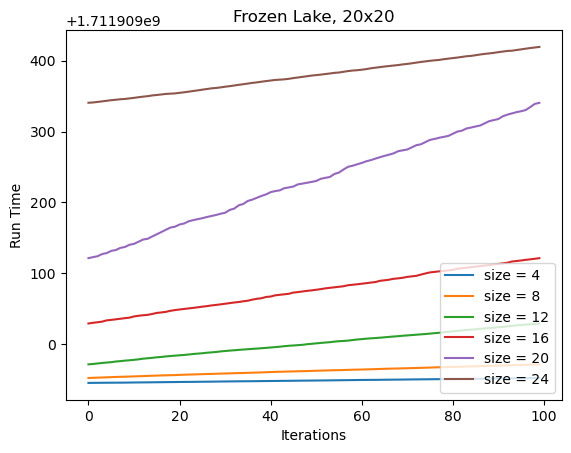

In [655]:
# RUN THIS CELL

for n in (range(4,28,4)):
    print('size = ', n)
    v_chart = []
    v_per_iter = []
    run_time_per_iter = []
    reward_per_iter = []
    
    # setting seed
    np.random.seed(42)

    # make gym environment
    frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=n), is_slippery = True, render_mode = 'ansi')

    for i in range(2, 1000,10):   

        # Initiating start_time
        start_time = time.time()

        # Running value iteration
        V, V_track, pi = Planner(frozen_lake.P).policy_iteration(gamma=0.999, n_iters=i, theta=0.00001)

        # Appending mean value scores for each iteration
        v_per_iter.append(np.mean(V))

        # Appending reward value for each iteration
        episode_rewards = TestEnv.test_env(env=frozen_lake, n_iters=100, pi=pi)
        reward_per_iter.append(np.mean(episode_rewards))

        # Recording run time
        end_time = time.time()
        run_time_per_iter.append(end_time)
        
    plt.plot(np.arange(len(v_per_iter)), run_time_per_iter, label = f'size = {n}')

# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Run Time')
plt.legend(loc = 'lower right')
plt.title(f'Frozen Lake, {size}x{size}')
plt.show()    

Final Policy - non-Deterministic


SHFF
FFFH
FFFH
HFFG

runtime = 0.01 seconds


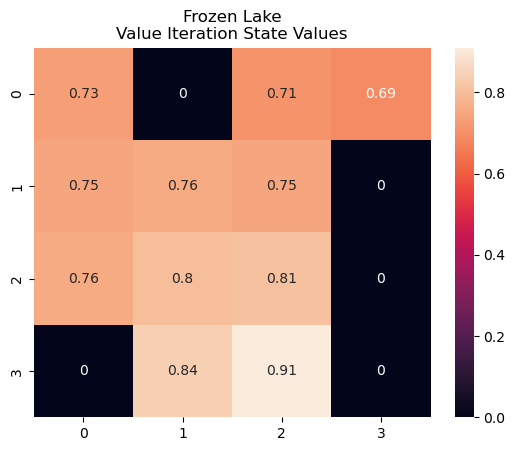

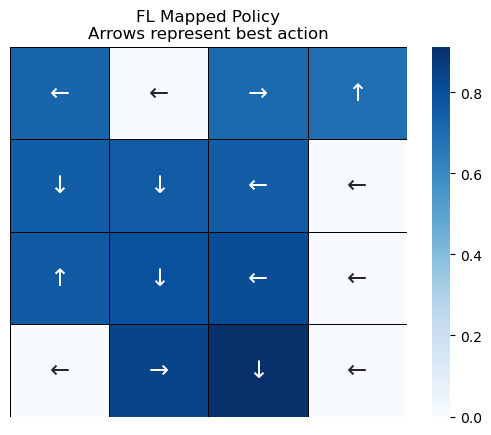

Total Run Time =  0.3473048210144043
{0: 0, 1: 0, 2: 2, 3: 3, 4: 1, 5: 1, 6: 0, 7: 0, 8: 3, 9: 1, 10: 0, 11: 0, 12: 0, 13: 2, 14: 1, 15: 0}
[0.72681167 0.         0.71067816 0.68977306 0.74883843 0.75878956
 0.75312154 0.         0.76158131 0.79740422 0.81272079 0.
 0.         0.8420758  0.91226591 0.        ]


In [256]:
start_time = time.time()

sz = 4

# setting seed
# np.random.seed(43)

# Map initialization (standard 4x4 map)
desc_1=["SFFF", "FHFH", "FFFH", "HFFG"]

# setting seed
np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
frozen_lake.reset()

# printing environment
print(frozen_lake.render())

# run VI
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(gamma=0.99, n_iters=5000, theta=0.000001)

# plot state values
size=(sz,sz)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
title="FL Mapped Policy\nArrows represent best action"

fl_map_size=(sz,sz)
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

end_time = time.time()
run_time = end_time - start_time  
print(f'Total Run Time = ', run_time)
print(pi)
print(V)

Final Policy - Deterministic


SHFF
FFFH
FFFH
HFFG

runtime = 0.00 seconds


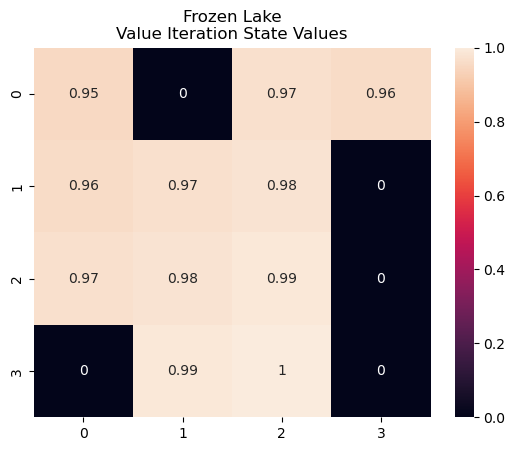

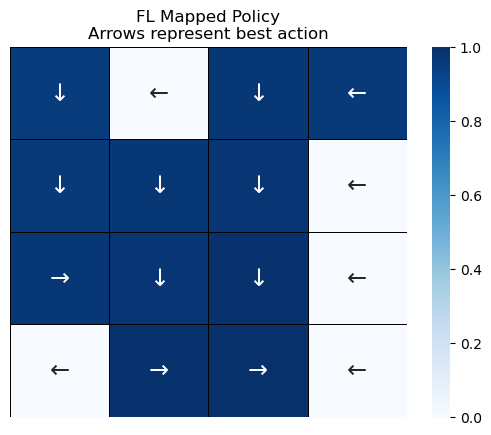

Total Run Time =  0.21155190467834473


In [294]:
start_time = time.time()

sz = 4

# setting seed
# np.random.seed(43)

# Map initialization (standard 4x4 map)
desc_1=["SFFF", "FHFH", "FFFH", "HFFG"]

# setting seed
np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = False, render_mode = 'ansi')
frozen_lake.reset()

# printing environment
print(frozen_lake.render())

# run VI
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(gamma=0.99, n_iters=5000, theta=0.000001)

# plot state values
size=(sz,sz)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
title="FL Mapped Policy\nArrows represent best action"

fl_map_size=(sz,sz)
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

end_time = time.time()
run_time = end_time - start_time  
print(f'Total Run Time = ', run_time)

Final Policy - non-Deterministic (Size = 20)


SHFFFFFHFFFHHFFFFFFF
FFFFFFFFFFFFFHHHFFFF
FFFHFFFFFFHFHHFHFFFF
FFHFFFFHFHFFFHFFFFFF
HFFFFFFFHFFFFFFFFFFF
FFFFHFFFFFFFHHFHHFHF
HHFFFFHHFFFFFFHFFFFH
HFFFFFFFFFHFFFHFFFFF
FFFFFHFFFFFFFFFFFFHF
FFHHFFHFFFFHHFFFFHHF
FFFHFFFFFFFFFFFFFFFH
FFFFFFHFHFFFFFFFFFFF
HHHFFHFHHHFFHFFFHFFF
FHFFHFFFFFHHHHFFFFFF
HFFFFFFFFFFFHFFFFFFF
FFFFFHFFFFFFFHHFFFFF
FFFFHFFFFFFFFFFFHFFF
FFFFFFFFFFFHFFFFFFHF
FFFFHFHHFFFFFFFFHFHF
FFFHFHFFFHHFFFFHHFFG

runtime = 7.51 seconds


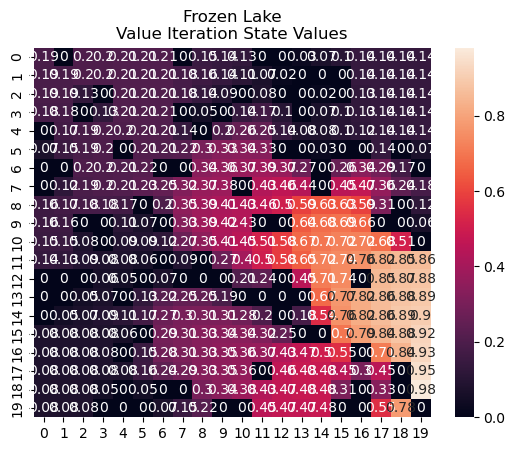

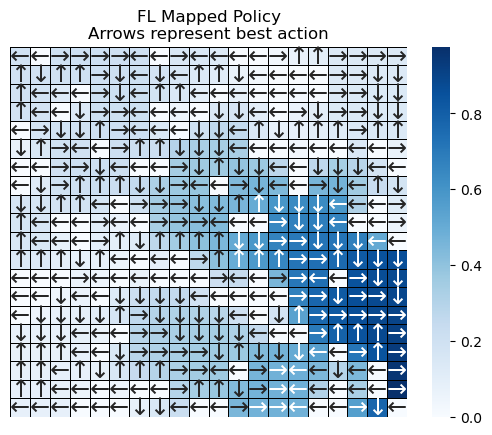

Total Run Time =  8.987533330917358


In [656]:
start_time = time.time()

sz = 20

# setting seed
# np.random.seed(43)

# Map initialization (standard 4x4 map)
desc_1=["SFFF", "FHFH", "FFFH", "HFFG"]

# setting seed
np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
frozen_lake.reset()

# printing environment
print(frozen_lake.render())

# run VI
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(gamma=0.999, n_iters=10000000, theta=0.000001)

# plot state values
size=(sz,sz)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
title="FL Mapped Policy\nArrows represent best action"

fl_map_size=(sz,sz)
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

end_time = time.time()
run_time = end_time - start_time  
print(f'Total Run Time = ', run_time)

Final Policy - Deterministic (Size = 20)


SHFFFFFHFFFHHFFFFFFF
FFFFFFFFFFFFFHHHFFFF
FFFHFFFFFFHFHHFHFFFF
FFHFFFFHFHFFFHFFFFFF
HFFFFFFFHFFFFFFFFFFF
FFFFHFFFFFFFHHFHHFHF
HHFFFFHHFFFFFFHFFFFH
HFFFFFFFFFHFFFHFFFFF
FFFFFHFFFFFFFFFFFFHF
FFHHFFHFFFFHHFFFFHHF
FFFHFFFFFFFFFFFFFFFH
FFFFFFHFHFFFFFFFFFFF
HHHFFHFHHHFFHFFFHFFF
FHFFHFFFFFHHHHFFFFFF
HFFFFFFFFFFFHFFFFFFF
FFFFFHFFFFFFFHHFFFFF
FFFFHFFFFFFFFFFFHFFF
FFFFFFFFFFFHFFFFFFHF
FFFFHFHHFFFFFFFFHFHF
FFFHFHFFFHHFFFFHHFFG

runtime = 0.07 seconds


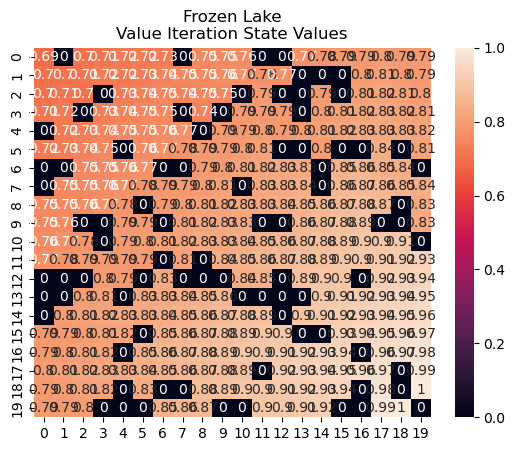

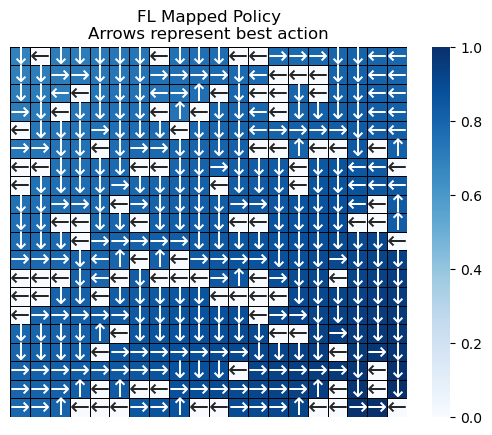

Total Run Time =  1.2332875728607178


In [657]:
start_time = time.time()

sz = 20

# setting seed
# np.random.seed(43)

# Map initialization (standard 4x4 map)
desc_1=["SFFF", "FHFH", "FFFH", "HFFG"]

# setting seed
np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = False, render_mode = 'ansi')
frozen_lake.reset()

# printing environment
print(frozen_lake.render())

# run VI
V, V_track, pi = Planner(frozen_lake.P).policy_iteration(gamma=0.99, n_iters=5000, theta=0.000001)

# plot state values
size=(sz,sz)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
title="FL Mapped Policy\nArrows represent best action"

fl_map_size=(sz,sz)
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

end_time = time.time()
run_time = end_time - start_time  
print(f'Total Run Time = ', run_time)

# 2.1 Blackjack 

In [304]:
base_env = gym.make('Blackjack-v1', render_mode= 'rgb_array')
blackjack = BlackjackWrapper(base_env)

# run VI
V, V_track, pi = Planner(blackjack.P).value_iteration()

#test policy
test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=pi, user_input=False)
print(np.mean(test_scores))

# Q-learning
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning()

#test policy
test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=pi, user_input=False)
print(np.mean(test_scores))

C:\Users\marcu\anaconda3\Lib\site-packages\gymnasium\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


runtime = 0.03 seconds
-0.03


runtime = 1.21 seconds
-0.06


In [339]:
import gymnasium as gym
import os
import pickle

class CustomTransformObservation(gym.ObservationWrapper):
    def __init__(self, env, func, observation_space):
        """
        Parameters
        ----------------------------
        env {gymnasium.Env}:
            Blackjack base environment to be wrapped

        func {lambda}:
            Function that converts the observation

        observation_space {gymnasium.spaces.Space}:
            New observation space
        """
        super().__init__(env)
        if observation_space is not None:
            self.observation_space = observation_space
        self.func = func

    def observation(self, observation):
        """
        Parameters
        ----------------------------
        observation {Tuple}:
            Blackjack base environment observation tuple

        Returns
        ----------------------------
        func(observation) {int}
        """
        return self.func(observation)

class BlackjackWrapper_mzhtan(gym.Wrapper):
    def __init__(self, env,data_dir):
        """
        Parameters
        ----------------------------
        env {gymnasium.Env}:
            Blackjack base environment

        Explanation of convert_state_obs lambda:
        Lambda function assigned to the variable `self._convert_state_obs` takes parameter, `state` and
        converts the input into a compact single integer value by concatenating player hand with dealer card.
        See comments above for further information.

        """
        self._transform_obs = lambda obs: (
            28 if (obs[0] == 21 and obs[2]) else  # Player hand equals 21 with usable ace
            27 if (obs[0] == 21 and not obs[2]) else  # Player hand equals 21 without usable ace
            (obs[0] + 6) // 2 if obs[2] else  # Binning other states with usable ace
            (obs[0] - 4) // 2  # Binning other states without usable ace
        )
        env = CustomTransformObservation(env, self._transform_obs, gym.spaces.Discrete(290))
        super().__init__(env)
        
        self.data_dir = data_dir
        file_name = 'blackjack-envP.pickle'
        f = os.path.join(self.data_dir, file_name)
        
        try:
            self._P = pickle.load(open(f, "rb"))
        except IOError:
            print("Pickle load failed.  Check path", f)

    @property
    def P(self):
        """
        Returns
        ----------------------------
        _P {dict}
        """
        return self._P

    @property
    def transform_obs(self):
        """
        Returns
        ----------------------------
        _transform_obs {lambda}
        """
        return self._transform_obs

# Value Iteration

runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds


C:\Users\marcu\anaconda3\Lib\site-packages\bettermdptools\algorithms\planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


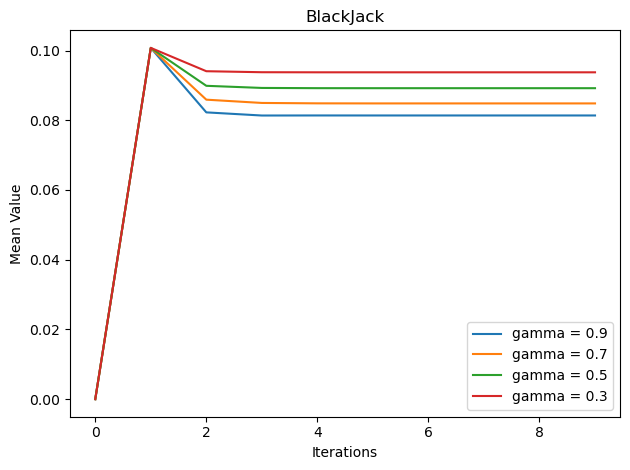

In [298]:
# Generating value per iteration

# Key takeaway: Reached convergence quickly, way more quickly than frozen lake. 
# Different values of gamma also provide different mean values.

v_per_iter = []
list_x = []
reward_per_iter = []
run_time_per_iter = []


base_env = gym.make('Blackjack-v1', render_mode= 'rgb_array')
blackjack = BlackjackWrapper(base_env)

for x in range(0,4):
    # Initiating start_time
    start_time = time.time()

    # Running value iteration
    V, V_track, pi = Planner(blackjack.P).value_iteration(gamma=0.9-(x*2)/10, n_iters=10, theta=1E-30)

    # Appending mean value scores for each iteration
    v_per_iter = np.mean(V_track,axis=1)

    # Recording run time
    end_time = time.time()
    run_time_per_iter.append(end_time)

    plt.plot(np.arange(len(v_per_iter)), v_per_iter, label = f'gamma = {round(0.9 - (x*2)/10, 2)}')
    
# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.legend(loc = 'lower right')
plt.title(f'BlackJack')

plt.tight_layout()
plt.show()



runtime = 0.00 seconds
runtime = 0.00 seconds
runtime = 0.00 seconds


C:\Users\marcu\anaconda3\Lib\site-packages\gymnasium\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds


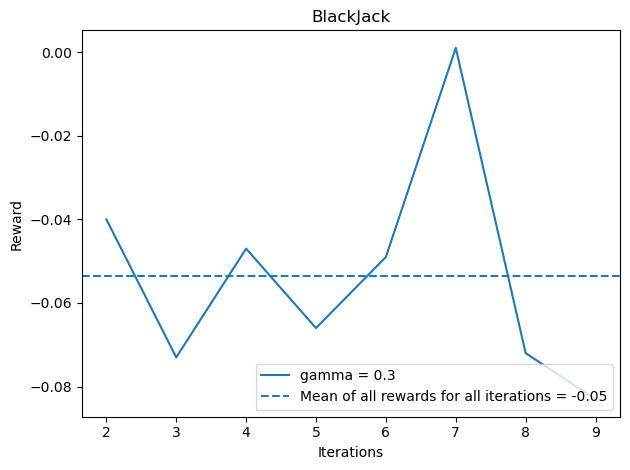

In [299]:
v_per_iter = []
list_x = []
reward_per_iter = []
run_time_per_iter = []

# For-loop for iteration
for i in range(2, 10):   
    
    list_x.append(i)
    # Initiating start_time
    start_time = time.time()

    # Running value iteration
    V, V_track, pi = Planner(blackjack.P).value_iteration(gamma=0.9, n_iters=i, theta=0.00000001)

    # Appending mean value scores for each iteration
    v_per_iter.append(np.mean(V))

    # Appending reward value for each iteration
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=1000, pi=pi)
    reward_per_iter.append(np.mean(episode_rewards))

    # Recording run time
    end_time = time.time()
    run_time_per_iter.append(end_time)

plt.plot(list_x, reward_per_iter, label = f'gamma = {round(0.3, 2)}')
plt.axhline(np.mean(reward_per_iter), linestyle = '--', label = f'Mean of all rewards for all iterations = {round(np.mean(reward_per_iter),2)}')


# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.legend(loc = 'lower right')
plt.title(f'BlackJack')

plt.tight_layout()

In [ ]:
# State Size Impact

C:\Users\marcu\anaconda3\Lib\site-packages\bettermdptools\algorithms\planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.00 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds


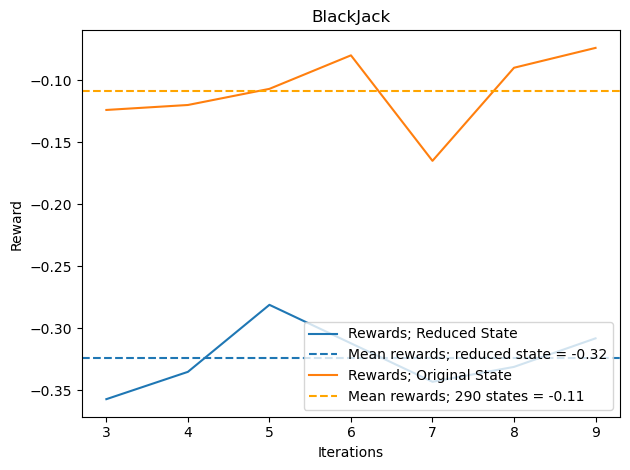

In [366]:
v_per_iter = []
list_x = []
reward_per_iter = []
run_time_per_iter_r = []

# For-loop for iteration
for i in range(3, 10):   
    
    list_x.append(i)

    # Blackjack environment
    data_dir = 'C:\\Users\\marcu\\Desktop\\GA Tech\\ML\\ML-SP24\\Assignment 4'
    base_env = gym.make('Blackjack-v1', render_mode='rgb_array')
    blackjack = BlackjackWrapper_mzhtan(base_env, data_dir)
    
    # Initiating start_time
    start_time = time.time()
    
    # Running value iteration
    V, V_track, pi_pi = Planner(blackjack.P).value_iteration(gamma=0.9, n_iters=i, theta=1e-99)
    
    # Recording run time
    end_time = time.time()
    elapsed_time = end_time - start_time
    run_time_per_iter_r.append(elapsed_time)

    # Appending mean value scores for each iteration
    v_per_iter.append(np.mean(V))

    # Appending reward value for each iteration
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=1000, pi=pi)
    reward_per_iter.append(np.mean(episode_rewards))



plt.plot(list_x, reward_per_iter, label = f'Rewards; Reduced State')
plt.axhline(np.mean(reward_per_iter), linestyle = '--', label = f'Mean rewards; reduced state = {round(np.mean(reward_per_iter),2)}')


v_per_iter = []
list_x = []
reward_per_iter = []
run_time_per_iter = []

# For-loop for iteration
for i in range(3, 10):   
    
    list_x.append(i)
    # Initiating start_time
    start_time = time.time()
    
    # Blackjack environment
    base_env = gym.make('Blackjack-v1', render_mode= 'rgb_array')
    blackjack = BlackjackWrapper(base_env)
    
    # Initiating start_time
    start_time = time.time()    
    
    # Running value iteration
    V, V_track, pi_pi = Planner(blackjack.P).value_iteration(gamma=0.9, n_iters=i, theta=1e-99)
    
    # Recording run time
    end_time = time.time()
    elapsed_time = end_time - start_time
    run_time_per_iter.append(elapsed_time)
    
    # Appending mean value scores for each iteration
    v_per_iter.append(np.mean(V))

    # Appending reward value for each iteration
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=1000, pi=pi)
    reward_per_iter.append(np.mean(episode_rewards))



plt.plot(list_x, reward_per_iter, label = f'Rewards; Original State')
plt.axhline(np.mean(reward_per_iter), linestyle = '--', color = 'orange', label = f'Mean rewards; 290 states = {round(np.mean(reward_per_iter),2)}')


# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.legend(loc = 'lower right')
plt.title(f'BlackJack')

plt.tight_layout()


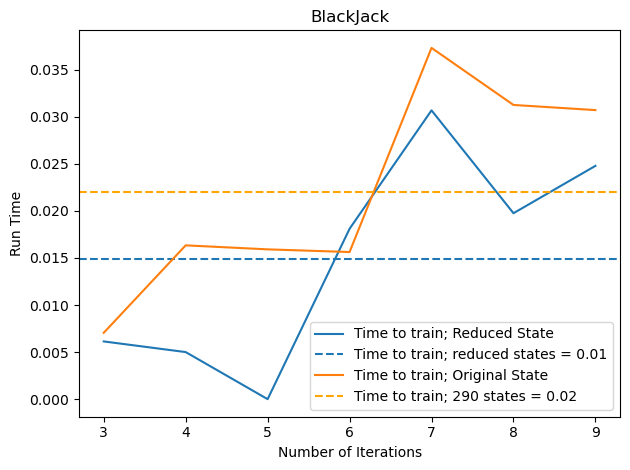

In [367]:
plt.plot(list_x, run_time_per_iter_r, label = f'Time to train; Reduced State')
plt.axhline(np.mean(run_time_per_iter_r), linestyle = '--', label = f'Time to train; reduced states = {round(np.mean(run_time_per_iter_r),2)}')

plt.plot(list_x, run_time_per_iter, label = f'Time to train; Original State')
plt.axhline(np.mean(run_time_per_iter), linestyle = '--', color = 'orange', label = f'Time to train; 290 states = {round(np.mean(run_time_per_iter),2)}')

plt.xlabel('Number of Iterations')
plt.ylabel('Run Time')
plt.legend(loc = 'lower right')
plt.title(f'BlackJack')

plt.tight_layout()


In [300]:
# Policy Printing
pi_v = pi
print(pi_v)

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 0, 83: 0, 84: 0, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 1, 126: 1, 127: 1, 128: 0, 129: 1, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

# Policy Iteration

runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds
runtime = 0.04 seconds


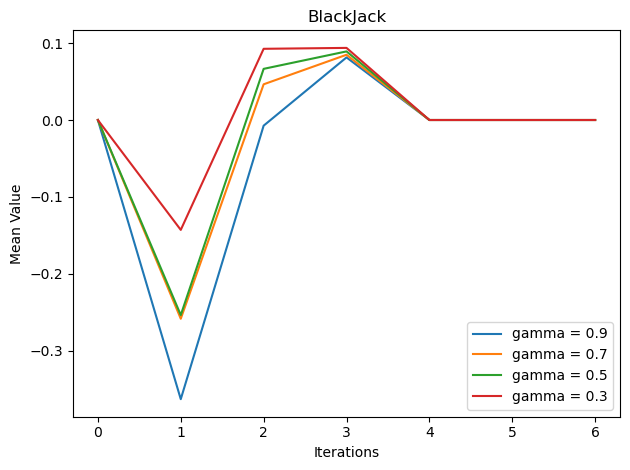

In [301]:
# Generating value per iteration

# Key takeaway: Reached convergence quickly, way more quickly than frozen lake. 
# Different values of gamma also provide different mean values.

v_per_iter = []
list_x = []
reward_per_iter = []
run_time_per_iter = []


base_env = gym.make('Blackjack-v1', render_mode= 'rgb_array')
blackjack = BlackjackWrapper(base_env)


for x in range(0,4):
    # Initiating start_time
    start_time = time.time()

    # Running value iteration
    V, V_track, pi = Planner(blackjack.P).policy_iteration(gamma=0.9-(x*2)/10, n_iters=7, theta=1E-99)

    # Appending mean value scores for each iteration
    v_per_iter = np.mean(V_track,axis=1)

    # Recording run time
    end_time = time.time()
    run_time_per_iter.append(end_time)

    plt.plot(np.arange(len(v_per_iter)), v_per_iter, label = f'gamma = {round(0.9 - (x*2)/10, 2)}')
    
# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.legend(loc = 'lower right')
plt.title(f'BlackJack')

plt.tight_layout()
plt.show()

runtime = 0.02 seconds
runtime = 0.05 seconds
runtime = 0.03 seconds
runtime = 0.05 seconds
runtime = 0.05 seconds
runtime = 0.06 seconds
runtime = 0.05 seconds


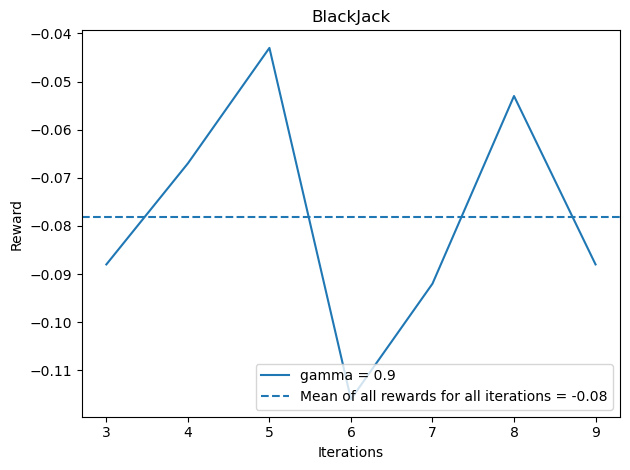

In [312]:
v_per_iter = []
list_x = []
reward_per_iter = []
run_time_per_iter = []

# For-loop for iteration
for i in range(3, 10):   
    
    list_x.append(i)
    # Initiating start_time
    start_time = time.time()
    
    # Blackjack environment
    base_env = gym.make('Blackjack-v1', render_mode= 'rgb_array')
    blackjack = BlackjackWrapper(base_env)
    
    # Running value iteration
    V, V_track, pi_pi = Planner(blackjack.P).policy_iteration(gamma=0.9, n_iters=i, theta=1e-99)

    # Appending mean value scores for each iteration
    v_per_iter.append(np.mean(V))

    # Appending reward value for each iteration
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=1000, pi=pi)
    reward_per_iter.append(np.mean(episode_rewards))

    # Recording run time
    end_time = time.time()
    run_time_per_iter.append(end_time)

plt.plot(list_x, reward_per_iter, label = f'gamma = {round(0.9, 2)}')
plt.axhline(np.mean(reward_per_iter), linestyle = '--', label = f'Mean of all rewards for all iterations = {round(np.mean(reward_per_iter),2)}')


# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.legend(loc = 'lower right')
plt.title(f'BlackJack')

plt.tight_layout()

In [303]:
import pandas as pd 
# Create a DataFrame from the dictionary
df = pd.DataFrame([pi_v])

# Append the dictionary to the DataFrame
df = df.append(pi, ignore_index=True)

print(df)

df.to_csv('test.csv')
# Interestingly, vi and pi policy differ in 6 states. state: 81,115,125,126,127,259

# VI hits
# 	81	115	125	126	127	259
# I have	H12	H15	H16	H17	H18	S19
# Dealer Have	4	7	7	8	9	Ace


   0    1    2    3    4    5    6    7    8    9    ...  280  281  282  283  \
0    1    1    1    1    1    1    1    1    1    1  ...    0    0    0    0   
1    1    1    1    1    1    1    1    1    1    1  ...    0    0    0    0   

   284  285  286  287  288  289  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  

[2 rows x 290 columns]


C:\Users\marcu\AppData\Local\Temp\ipykernel_39580\1071196900.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pi, ignore_index=True)


In [ ]:
# Blackjack Size

runtime = 0.02 seconds
runtime = 0.07 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.04 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.06 seconds
runtime = 0.04 seconds
runtime = 0.05 seconds
runtime = 0.05 seconds
runtime = 0.06 seconds
runtime = 0.07 seconds


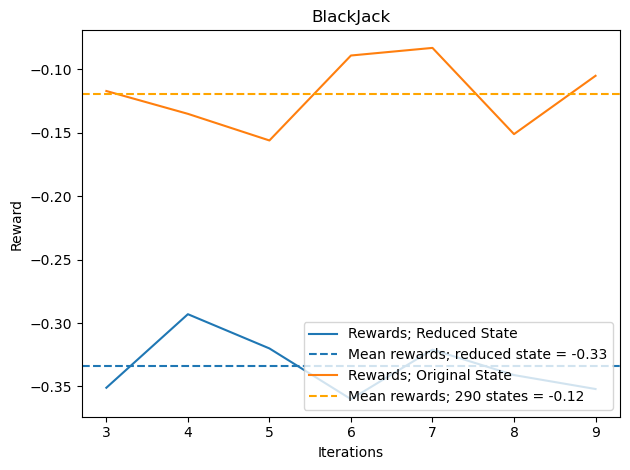

In [363]:
v_per_iter = []
list_x = []
reward_per_iter = []
run_time_per_iter_r = []

# For-loop for iteration
for i in range(3, 10):   
    
    list_x.append(i)

    # Blackjack environment
    data_dir = 'C:\\Users\\marcu\\Desktop\\GA Tech\\ML\\ML-SP24\\Assignment 4'
    base_env = gym.make('Blackjack-v1', render_mode='rgb_array')
    blackjack = BlackjackWrapper_mzhtan(base_env, data_dir)
    
    # Initiating start_time
    start_time = time.time()
    
    # Running value iteration
    V, V_track, pi_pi = Planner(blackjack.P).policy_iteration(gamma=0.9, n_iters=i, theta=1e-99)
    
    # Recording run time
    end_time = time.time()
    elapsed_time = end_time - start_time
    run_time_per_iter_r.append(elapsed_time)

    # Appending mean value scores for each iteration
    v_per_iter.append(np.mean(V))

    # Appending reward value for each iteration
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=1000, pi=pi)
    reward_per_iter.append(np.mean(episode_rewards))



plt.plot(list_x, reward_per_iter, label = f'Rewards; Reduced State')
plt.axhline(np.mean(reward_per_iter), linestyle = '--', label = f'Mean rewards; reduced state = {round(np.mean(reward_per_iter),2)}')


v_per_iter = []
list_x = []
reward_per_iter = []
run_time_per_iter = []

# For-loop for iteration
for i in range(3, 10):   
    
    list_x.append(i)
    # Initiating start_time
    start_time = time.time()
    
    # Blackjack environment
    base_env = gym.make('Blackjack-v1', render_mode= 'rgb_array')
    blackjack = BlackjackWrapper(base_env)
    
    # Initiating start_time
    start_time = time.time()    
    
    # Running value iteration
    V, V_track, pi_pi = Planner(blackjack.P).policy_iteration(gamma=0.9, n_iters=i, theta=1e-99)
    
    # Recording run time
    end_time = time.time()
    elapsed_time = end_time - start_time
    run_time_per_iter.append(elapsed_time)
    
    # Appending mean value scores for each iteration
    v_per_iter.append(np.mean(V))

    # Appending reward value for each iteration
    episode_rewards = TestEnv.test_env(env=blackjack, n_iters=1000, pi=pi)
    reward_per_iter.append(np.mean(episode_rewards))



plt.plot(list_x, reward_per_iter, label = f'Rewards; Original State')
plt.axhline(np.mean(reward_per_iter), linestyle = '--', color = 'orange', label = f'Mean rewards; 290 states = {round(np.mean(reward_per_iter),2)}')


# plt.clf()
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.legend(loc = 'lower right')
plt.title(f'BlackJack')

plt.tight_layout()



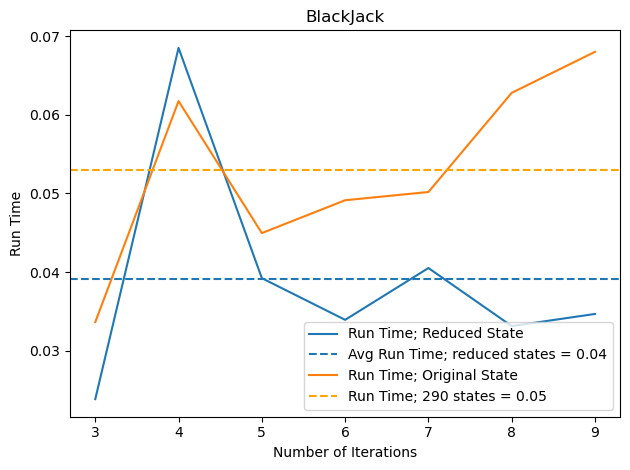

In [364]:
plt.plot(list_x, run_time_per_iter_r, label = f'Time to train; Reduced State')
plt.axhline(np.mean(run_time_per_iter_r), linestyle = '--', label = f'Time to train; reduced states = {round(np.mean(run_time_per_iter_r),2)}')

plt.plot(list_x, run_time_per_iter, label = f'Time to train; Original State')
plt.axhline(np.mean(run_time_per_iter), linestyle = '--', color = 'orange', label = f'Time to train; 290 states = {round(np.mean(run_time_per_iter),2)}')

plt.xlabel('Number of Iterations')
plt.ylabel('Run Time')
plt.legend(loc = 'lower right')
plt.title(f'BlackJack')

plt.tight_layout()


# Playground

In [ ]:
# Q Learning function definition

In [623]:
def qtable(env, learning_rate, gamma, epsilon, num_episodes):
    # Initialize Q-table
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    q_table = np.zeros((num_states, num_actions))

    # Q-learning algorithm
    for episode in range(num_episodes):
        
        # Introducing epsilon greedy
        epsilon = max(0, epsilon - 0.01 * episode)
        
        state = env.reset()[0]
        done = False
#         print('episode = ', episode)

        while not done:
            # Choose action using epsilon-greedy policy
            if np.random.rand() < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(Q[state])  # Exploit

            # Take action and observe next state and reward
            next_state, reward, terminating, x, probability = env.step(action)     
            
            if terminating is True and reward == 0:
                reward = -10
            elif terminating is True and reward == 1:
                reward = 10
            else:
                reward = -0.05

            # Update Q-value of current state-action pair
            Q[state][action] += learning_rate * (reward + gamma * np.max(Q[next_state]) - Q[state][action])

            # Update current state
            state = next_state
            
            if terminating is True:
                break
    return Q

In [ ]:
# Learnt that you have got to push your agent in the right direction. I.e. make the rewards more exemplified, 
# Otherwise, it'll take many episodes to learn the results

In [624]:
# RUN THIS CELL

sz = 4
# Start with a Grid Search to identify parameters
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
gamma=[.99,0.95,0.9,0.8,0.7]
epsilon_decay = [.9,.8,.7]
iters = [500, 5000, 50000,500000]
GridSearch.q_learning_grid_search(frozen_lake, gamma, epsilon_decay, iters)

running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 500


runtime = 0.29 seconds
Avg. episode reward:  1.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 5000


runtime = 2.65 seconds
Avg. episode reward:  1.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 50000


KeyboardInterrupt: 

In [ ]:
# RUN THIS CELL

sz = 20
# Start with a Grid Search to identify parameters
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
gamma=[.99,0.95,0.9,0.8,0.7]
epsilon_decay = [.9,.8,.7]
iters = [500, 5000, 50000,500000]
GridSearch.q_learning_grid_search(frozen_lake, gamma, epsilon_decay, iters)

In [ ]:
# ONCE YOU SEE THE OPTIMAL GRID SEARCH, THEN PROCEED ON WITH THE HYPERPARAMETERS FOR BOTH OF THE FROZEN LAKE SIZES
# AND TRAIN YOUR AGENT BASED ON THESE SIZES. 
# IDENTIFY THE REWARD PER ITERATION
# DO A Q LEARNING ON DIFFERENT SIZE, YOU'VE ALREADY SEEN THE OPTIMAL HYPERPARAMETERS FOR 4 AND 20
# PLOT OUT THE OPTIMAL POLICY ONCE DONE!

In [511]:
# Define hyperparameters
learning_rate = 0.5
gamma = 0.9
epsilon = 0.9
num_episodes = 1000000

np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
frozen_lake.reset()
print(frozen_lake.render())


Q = qtable(env = frozen_lake, learning_rate = learning_rate, gamma = gamma, epsilon = epsilon, num_episodes = num_episodes)
# print(frozen_lake.observation_space.n)

print(Q)
# fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}




# Define hyperparameters
learning_rate = 0.5
gamma = 0.9
epsilon = 0.8
num_episodes = 1000000

np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
frozen_lake.reset()
print(frozen_lake.render())


Q = qtable(env = frozen_lake, learning_rate = learning_rate, gamma = gamma, epsilon = epsilon, num_episodes = num_episodes)
# print(frozen_lake.observation_space.n)

print(Q)





# Define hyperparameters
learning_rate = 0.5
gamma = 0.9
epsilon = 0.7
num_episodes = 1000000

np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
frozen_lake.reset()
print(frozen_lake.render())


Q = qtable(env = frozen_lake, learning_rate = learning_rate, gamma = gamma, epsilon = epsilon, num_episodes = num_episodes)
# print(frozen_lake.observation_space.n)

print(Q)







# Define hyperparameters
learning_rate = 0.5
gamma = 0.9
epsilon = 0.6
num_episodes = 1000000

np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
frozen_lake.reset()
print(frozen_lake.render())


Q = qtable(env = frozen_lake, learning_rate = learning_rate, gamma = gamma, epsilon = epsilon, num_episodes = num_episodes)
# print(frozen_lake.observation_space.n)

print(Q)












# Define hyperparameters
learning_rate = 0.5
gamma = 0.9
epsilon = 0.5
num_episodes = 1000000

np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
frozen_lake.reset()
print(frozen_lake.render())


Q = qtable(env = frozen_lake, learning_rate = learning_rate, gamma = gamma, epsilon = epsilon, num_episodes = num_episodes)
# print(frozen_lake.observation_space.n)

print(Q)
# state = env.reset()
# print(state[0])


# s, r, t, p, x = frozen_lake.step(2)
# print(s)

# s, r, t, p, x = frozen_lake.step(1)
# print(s)

# s, r, t, p, x = frozen_lake.step(1)
# print(s)

# s, r, t, p, x = frozen_lake.step(2)
# print(s)

# s, r, t, p, x = frozen_lake.step(2)
# print(s)
# print(r)
# print(t)
# print(p)
# print(x)

# s, r, t, p, x = frozen_lake.step(1)
# # print('x')
# print(s)
# print(r)
# print(t)
# print(p)
# print(x)

# s, r, t, p, x = frozen_lake.step(2)
# print(s)
# print(r)
# print(t)
# print(p)
# print(x)



# # Evaluate policy
# total_rewards = []
# for episode in range(100):
#     state = env.reset()
#     done = False
#     episode_reward = 0
    
#     while not done:
#         action = np.argmax(Q[state, :])
#         next_state, reward, done, _ = env.step(action)
#         episode_reward += reward
#         state = next_state
    
#     total_rewards.append(episode_reward)

# # Print average rewards
# print("Average reward:", np.mean(total_rewards))


SHFF
FFFH
FFFH
HFFG

[[6.93047859e-02 8.02958093e-04 1.12258627e-03 1.13505626e-03]
 [1.95646847e-10 1.73060570e-10 1.53995355e-10 1.96837171e-10]
 [1.51554666e-10 1.47755284e-10 1.01556163e-02 1.52291330e-10]
 [1.43307911e-10 2.07062369e-03 1.11145547e-10 1.40709413e-10]
 [1.62694554e-03 1.69391679e-03 1.07201158e-01 1.68640581e-03]
 [1.09716037e-03 1.10057352e-01 7.22508938e-04 9.74592975e-04]
 [2.15062700e-01 2.33503976e-04 1.40146873e-10 3.73229987e-04]
 [1.52530996e-10 1.93582813e-10 1.32738897e-10 1.36269060e-10]
 [2.40069760e-03 1.67688455e-03 2.61381118e-03 1.67969834e-01]
 [2.76109310e-03 2.07277224e-03 1.56522798e-01 2.60148796e-03]
 [1.38915315e-10 5.31008569e-05 5.61667951e-02 1.24312899e-10]
 [1.79170226e-10 1.51048206e-10 1.38476766e-10 1.84378983e-10]
 [1.29749064e-10 1.39221790e-10 1.07362056e-10 1.11891010e-10]
 [1.19486359e-10 1.26628734e-10 2.20331236e-01 1.00074431e-10]
 [1.18993231e-10 1.17565002e-10 8.68101678e-01 1.16608093e-10]
 [1.19512818e-10 1.98388036e-10 1

In [611]:
# Define hyperparameters
learning_rate = 0.5
gamma = 0.999
epsilon = 0.5
num_episodes = 100000

np.random.seed(42)

# make gym environment
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=sz), is_slippery = True, render_mode = 'ansi')
frozen_lake.reset()
print(frozen_lake.render())


Q = qtable(env = frozen_lake, learning_rate = learning_rate, gamma = gamma, epsilon = epsilon, num_episodes = num_episodes)
# print(frozen_lake.observation_space.n)

print(Q)




SHFF
FFFH
FFFH
HFFG

[[ 8.53492312e+00  1.61286161e+00  5.60700555e+00  5.39291682e+00]
 [-2.01664039e+00 -1.74951520e+00 -2.01370912e+00 -2.01751437e+00]
 [-1.78618347e+00 -3.91097461e-01  7.68999629e+00 -1.95576679e+00]
 [ 1.58823373e+00 -9.17434948e+00 -8.34646774e+00  7.17711140e+00]
 [ 6.70601415e+00  8.40806020e+00  6.81878403e+00  6.84183338e+00]
 [-6.69898891e+00  8.71089233e+00  5.51585424e+00 -2.33586758e+00]
 [ 8.63205505e+00  3.49007121e+00  3.95873508e+00  1.52618113e+00]
 [ 1.52530996e-10  1.93582813e-10  1.32738897e-10  1.36269060e-10]
 [ 4.61255621e+00  3.90849218e+00  3.46014292e+00  8.65381124e+00]
 [ 6.57615492e+00  6.56836162e+00  8.96269613e+00  6.97062716e+00]
 [ 9.23528924e+00 -8.98459340e-01  5.02579801e+00  3.71805293e+00]
 [ 1.79170226e-10  1.51048206e-10  1.38476766e-10  1.84378983e-10]
 [ 1.29749064e-10  9.17689985e+00  1.07362056e-10  1.11891010e-10]
 [ 1.64882283e+00  4.51582101e+00  9.37146834e+00  1.45272402e-01]
 [ 7.51892613e+00  9.91582797e+00  6.311

In [614]:

print(frozen_lake.render())
# Evaluate policy
total_rewards = []
for episode in range(100):
    state = frozen_lake.reset()[0]
    done = False
    episode_reward = 0
    print('episode = ', episode)
    while not done:
        action = np.argmax(Q[state])
        # Take action and observe next state and reward
        next_state, reward, terminating, x, probability = frozen_lake.step(action) 

        
        if terminating is True and reward == 0:
            reward = -10
        elif terminating is True and reward == 1:
            reward = 10
        else:
            reward = -0.05
        
        episode_reward += reward
        state = next_state
        
        if terminating is True:
            break
            
    total_rewards.append(episode_reward)

  (Down)
SHFF
FFFH
FFFH
HFFG

episode =  0
episode =  1
episode =  2
episode =  3
episode =  4
episode =  5
episode =  6
episode =  7
episode =  8
episode =  9
episode =  10
episode =  11
episode =  12
episode =  13
episode =  14
episode =  15
episode =  16
episode =  17
episode =  18
episode =  19
episode =  20
episode =  21
episode =  22
episode =  23
episode =  24
episode =  25
episode =  26
episode =  27
episode =  28
episode =  29
episode =  30
episode =  31
episode =  32
episode =  33
episode =  34
episode =  35
episode =  36
episode =  37
episode =  38
episode =  39
episode =  40
episode =  41
episode =  42
episode =  43
episode =  44
episode =  45
episode =  46
episode =  47
episode =  48
episode =  49
episode =  50
episode =  51
episode =  52
episode =  53
episode =  54
episode =  55
episode =  56
episode =  57
episode =  58
episode =  59
episode =  60
episode =  61
episode =  62
episode =  63
episode =  64
episode =  65
episode =  66
episode =  67
episode =  68
episode =  69


In [615]:

# fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}

print(np.mean(total_rewards))

8.256500000000003


In [589]:
# fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}

direction = (np.argmax(Q,axis=1))
dict_pi = {}
for q in range(0,len(direction)):
    dict_pi[q]=direction[q]

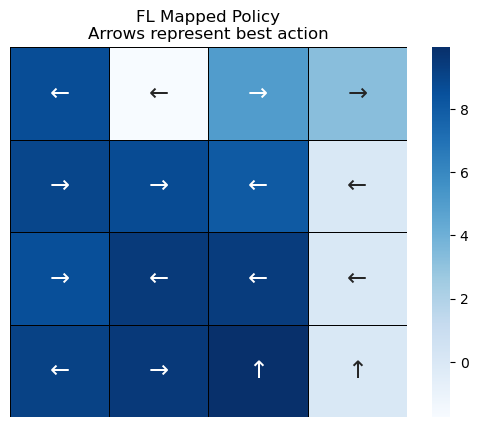

In [590]:
fl_map_size=(4,4)
V = np.max(Q,axis=1)

fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
title="FL Mapped Policy\nArrows represent best action"

fl_map_size=(4,4)
val_max, policy_map = Plots.get_policy_map(pi, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)



In [552]:
print(type(V))

<class 'numpy.ndarray'>


In [ ]:
base_env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(base_env)

# run VI
V, V_track, pi = Planner(blackjack.P).value_iteration()

#test policy
test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=pi, user_input=False)
print(np.mean(test_scores))

# Q-learning
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning()

#test policy
test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=pi, user_input=False)
print(np.mean(test_scores))